In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset=pd.read_csv("Breast_Cancer (9).csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
a=dataset[["fractal_dimension_se","smoothness_se","concave points_se","symmetry_se","compactness_se","concavity_se"]]

In [5]:
a

,fractal_dimension_se,smoothness_se,concave points_se,symmetry_se,compactness_se,concavity_se
0,0.006193,0.006399,0.01587,0.03003,0.04904,0.05373
1,0.003532,0.005225,0.01340,0.01389,0.01308,0.01860
2,0.004571,0.006150,0.02058,0.02250,0.04006,0.03832
3,0.009208,0.009110,0.01867,0.05963,0.07458,0.05661
4,0.005115,0.011490,0.01885,0.01756,0.02461,0.05688
...,...,...,...,...,...,...
564,0.004239,0.010300,0.02454,0.01114,0.02891,0.05198
565,0.002498,0.005769,0.01678,0.01898,0.02423,0.03950
566,0.003892,0.005903,0.01557,0.01318,0.03731,0.04730
567,0.006185,0.006522,0.01664,0.02324,0.06158,0.07117


<Axes: >

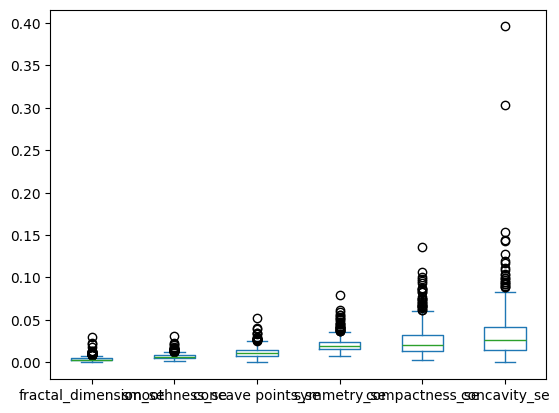

In [6]:
a.plot(kind="box")

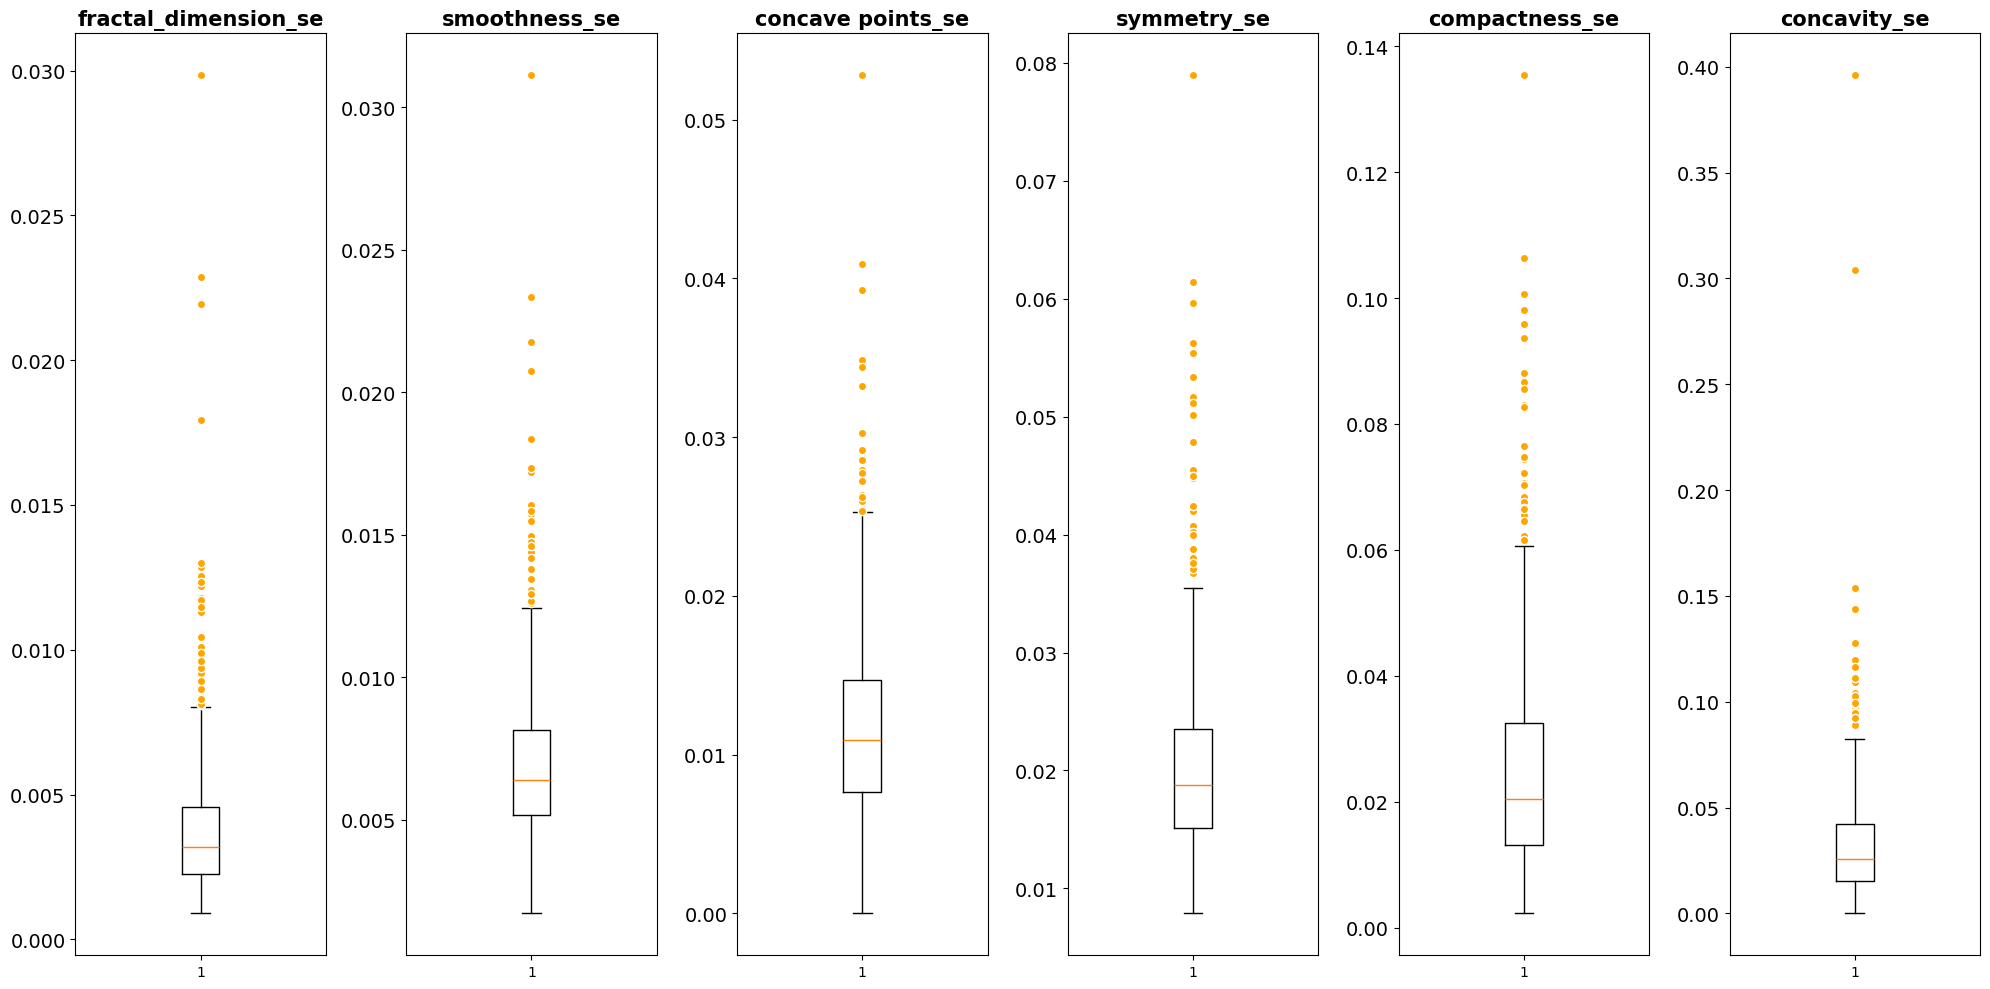

In [7]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(a.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(a.iloc[:,i], flierprops=orange_circle)
    ax.set_title(a.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [8]:
b=dataset[["concave points_mean",
"fractal_dimension_mean",
"fractal_dimension_worst",
"concavity_mean",
"smoothness_mean",
"compactness_mean"
]]

In [9]:
b

,concave points_mean,fractal_dimension_mean,fractal_dimension_worst,concavity_mean,smoothness_mean,compactness_mean
0,0.14710,0.07871,0.11890,0.30010,0.11840,0.27760
1,0.07017,0.05667,0.08902,0.08690,0.08474,0.07864
2,0.12790,0.05999,0.08758,0.19740,0.10960,0.15990
3,0.10520,0.09744,0.17300,0.24140,0.14250,0.28390
4,0.10430,0.05883,0.07678,0.19800,0.10030,0.13280
...,...,...,...,...,...,...
564,0.13890,0.05623,0.07115,0.24390,0.11100,0.11590
565,0.09791,0.05533,0.06637,0.14400,0.09780,0.10340
566,0.05302,0.05648,0.07820,0.09251,0.08455,0.10230
567,0.15200,0.07016,0.12400,0.35140,0.11780,0.27700


<Axes: >

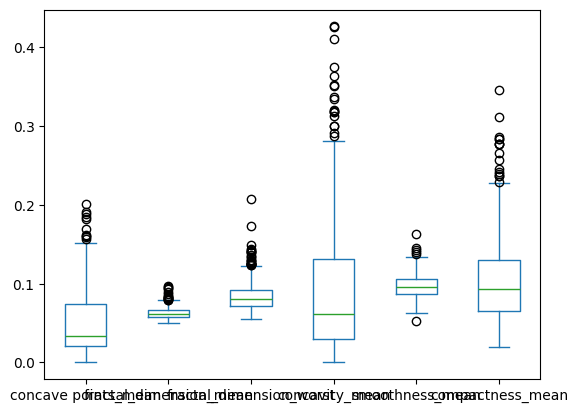

In [10]:
b.plot(kind="box")

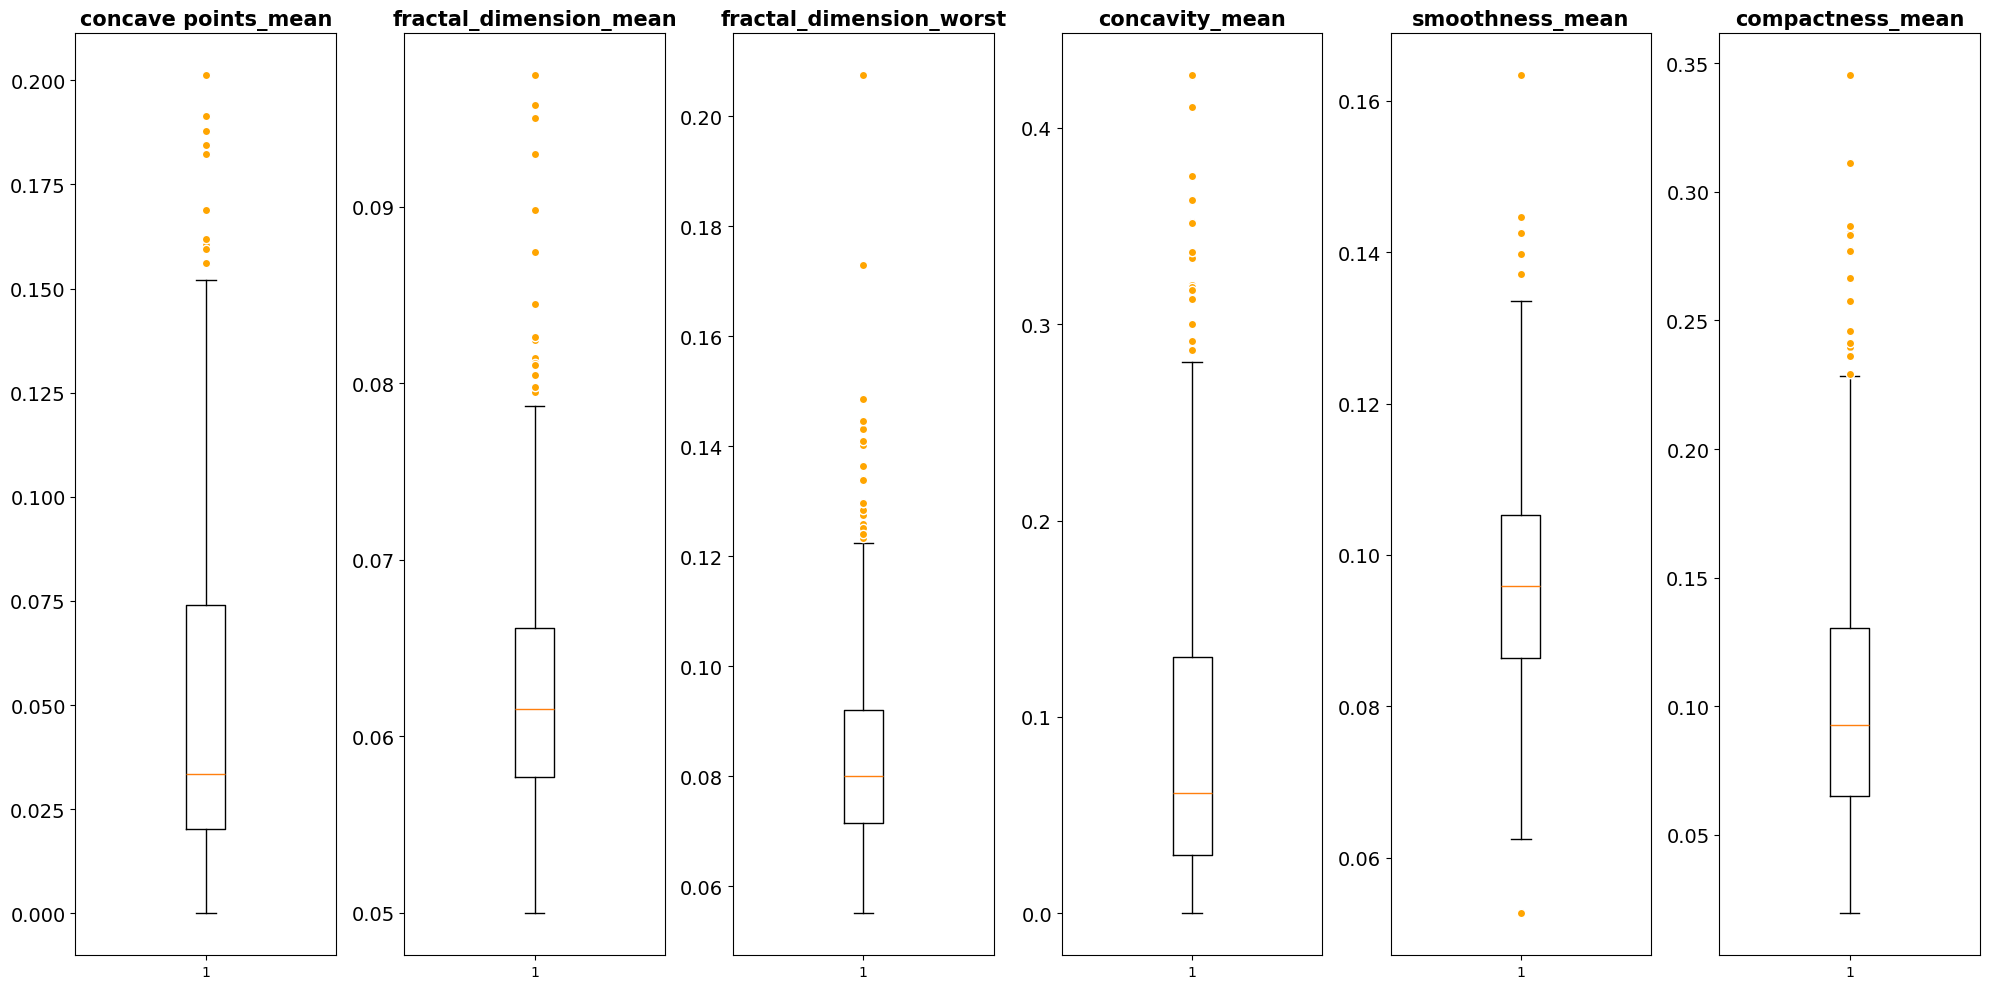

In [11]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(b.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(b.iloc[:,i], flierprops=orange_circle)
    ax.set_title(b.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [12]:
c=dataset[["concave points_worst",
"smoothness_worst",
"symmetry_mean",
"compactness_worst",
"concavity_worst",
"symmetry_worst"
]]

In [13]:
c

,concave points_worst,smoothness_worst,symmetry_mean,compactness_worst,concavity_worst,symmetry_worst
0,0.2654,0.16220,0.2419,0.66560,0.7119,0.4601
1,0.1860,0.12380,0.1812,0.18660,0.2416,0.2750
2,0.2430,0.14440,0.2069,0.42450,0.4504,0.3613
3,0.2575,0.20980,0.2597,0.86630,0.6869,0.6638
4,0.1625,0.13740,0.1809,0.20500,0.4000,0.2364
...,...,...,...,...,...,...
564,0.2216,0.14100,0.1726,0.21130,0.4107,0.2060
565,0.1628,0.11660,0.1752,0.19220,0.3215,0.2572
566,0.1418,0.11390,0.1590,0.30940,0.3403,0.2218
567,0.2650,0.16500,0.2397,0.86810,0.9387,0.4087


<Axes: >

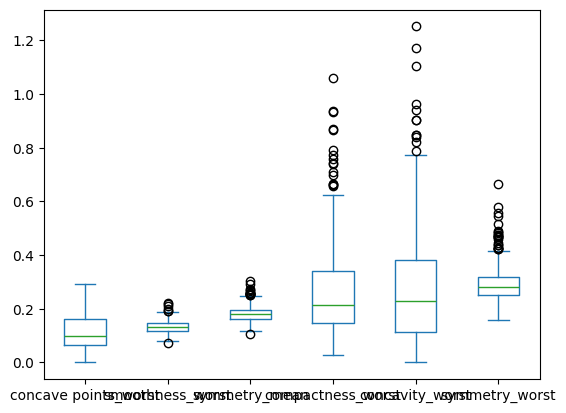

In [14]:
c.plot(kind="box")

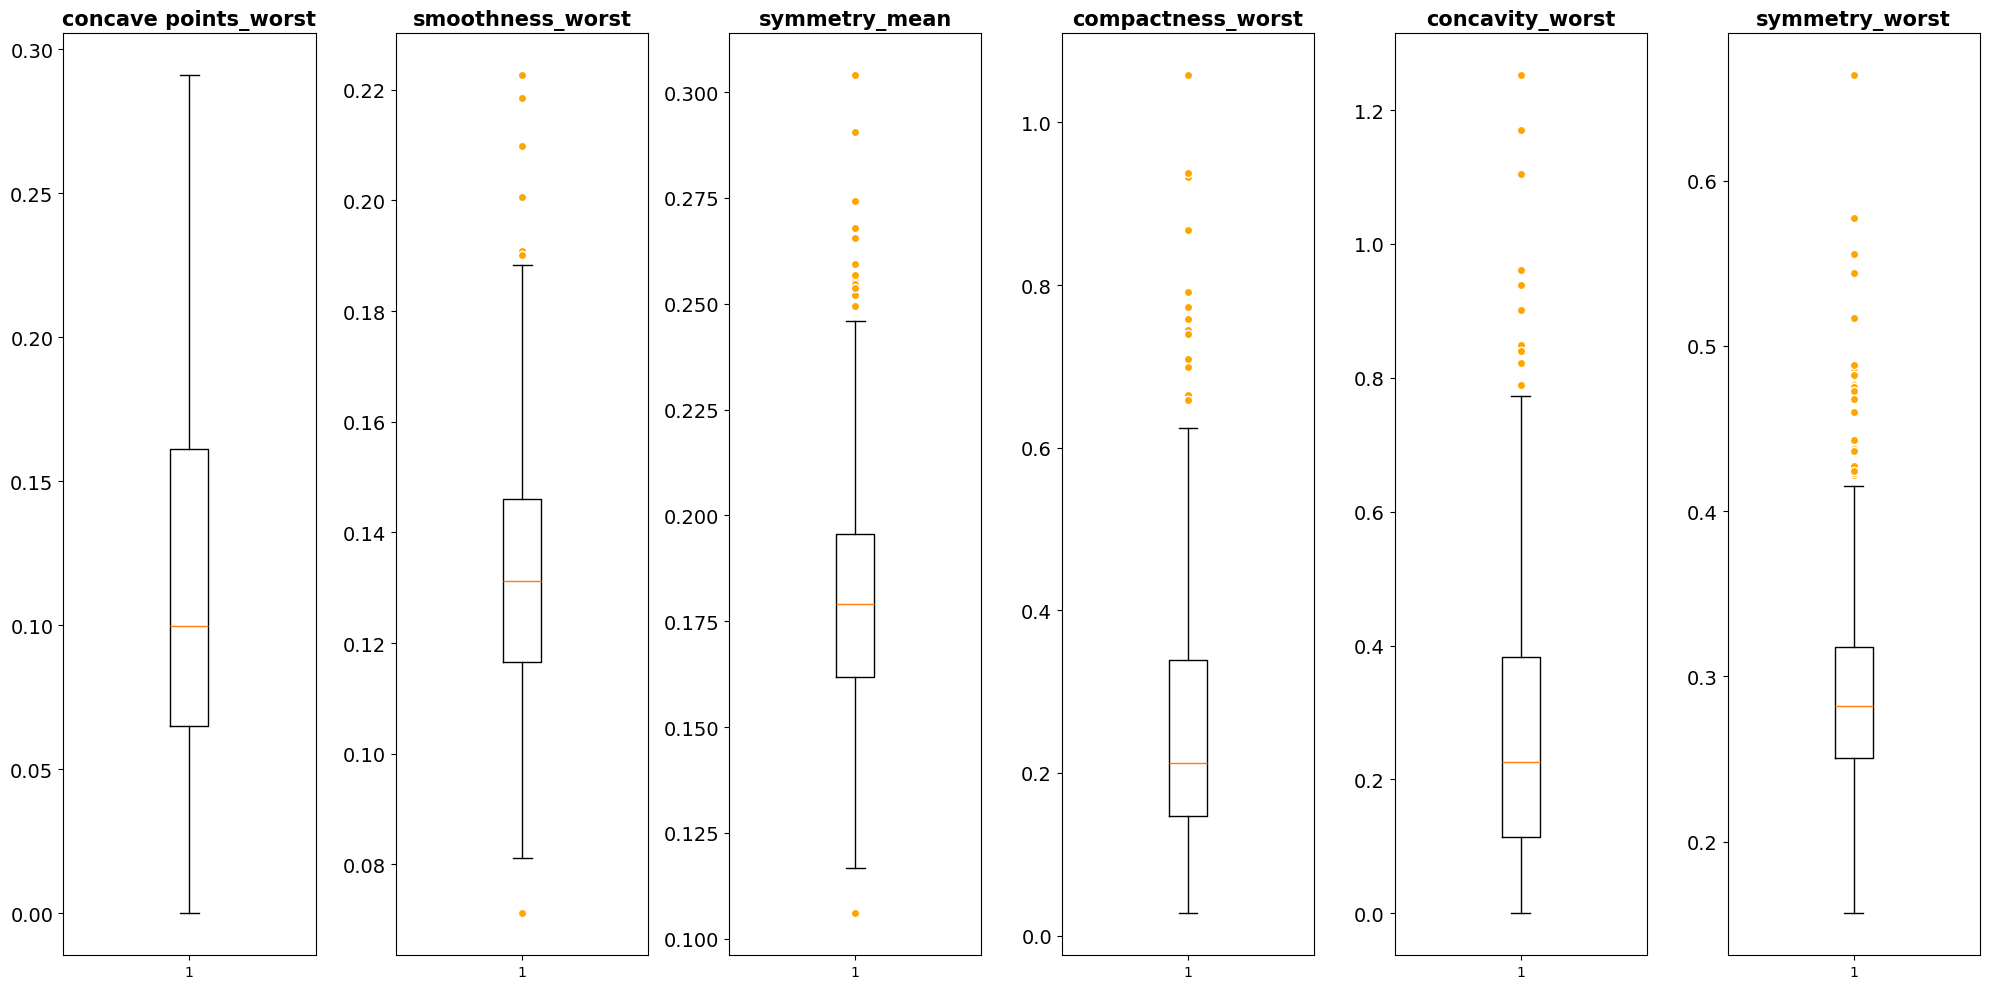

In [15]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(c.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(c.iloc[:,i], flierprops=orange_circle)
    ax.set_title(c.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [16]:
d=dataset[["radius_se",
"texture_se",
"perimeter_se",
"radius_mean",
"radius_worst",
"texture_mean"
]]

In [17]:
d

,radius_se,texture_se,perimeter_se,radius_mean,radius_worst,texture_mean
0,1.0950,0.9053,8.589,17.99,25.380,10.38
1,0.5435,0.7339,3.398,20.57,24.990,17.77
2,0.7456,0.7869,4.585,19.69,23.570,21.25
3,0.4956,1.1560,3.445,11.42,14.910,20.38
4,0.7572,0.7813,5.438,20.29,22.540,14.34
...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,21.56,25.450,22.39
565,0.7655,2.4630,5.203,20.13,23.690,28.25
566,0.4564,1.0750,3.425,16.60,18.980,28.08
567,0.7260,1.5950,5.772,20.60,25.740,29.33


<Axes: >

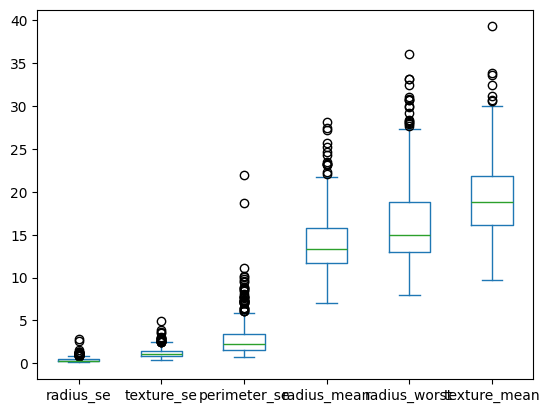

In [18]:
d.plot(kind="box")

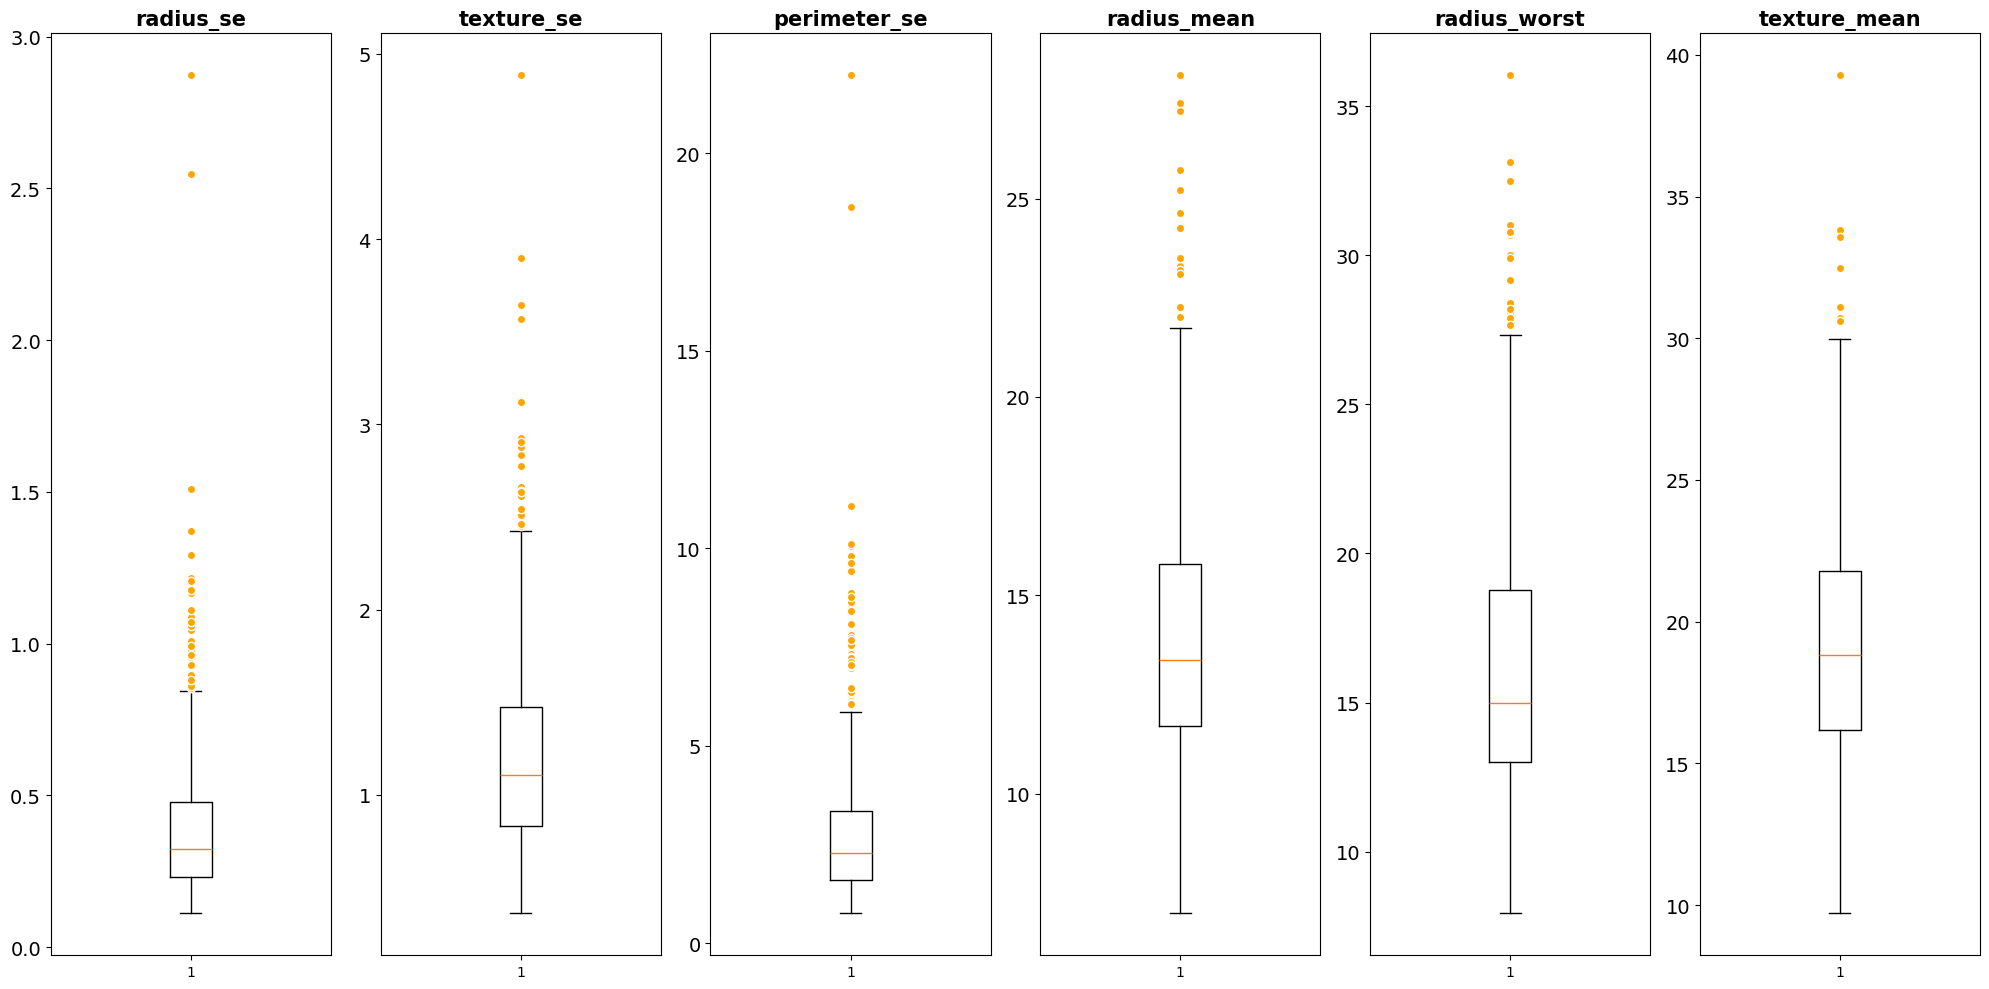

In [19]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(d.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(d.iloc[:,i], flierprops=orange_circle)
    ax.set_title(d.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [20]:
e=dataset[["texture_worst",
"area_se",
"perimeter_mean",
"perimeter_worst",
"area_mean",
"area_worst"
]]

In [21]:
e


,texture_worst,area_se,perimeter_mean,perimeter_worst,area_mean,area_worst
0,17.33,153.40,122.80,184.60,1001.0,2019.0
1,23.41,74.08,132.90,158.80,1326.0,1956.0
2,25.53,94.03,130.00,152.50,1203.0,1709.0
3,26.50,27.23,77.58,98.87,386.1,567.7
4,16.67,94.44,135.10,152.20,1297.0,1575.0
...,...,...,...,...,...,...
564,26.40,158.70,142.00,166.10,1479.0,2027.0
565,38.25,99.04,131.20,155.00,1261.0,1731.0
566,34.12,48.55,108.30,126.70,858.1,1124.0
567,39.42,86.22,140.10,184.60,1265.0,1821.0


<Axes: >

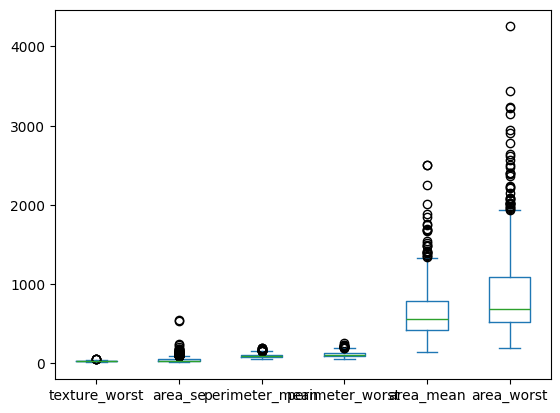

In [22]:
e.plot(kind="box")

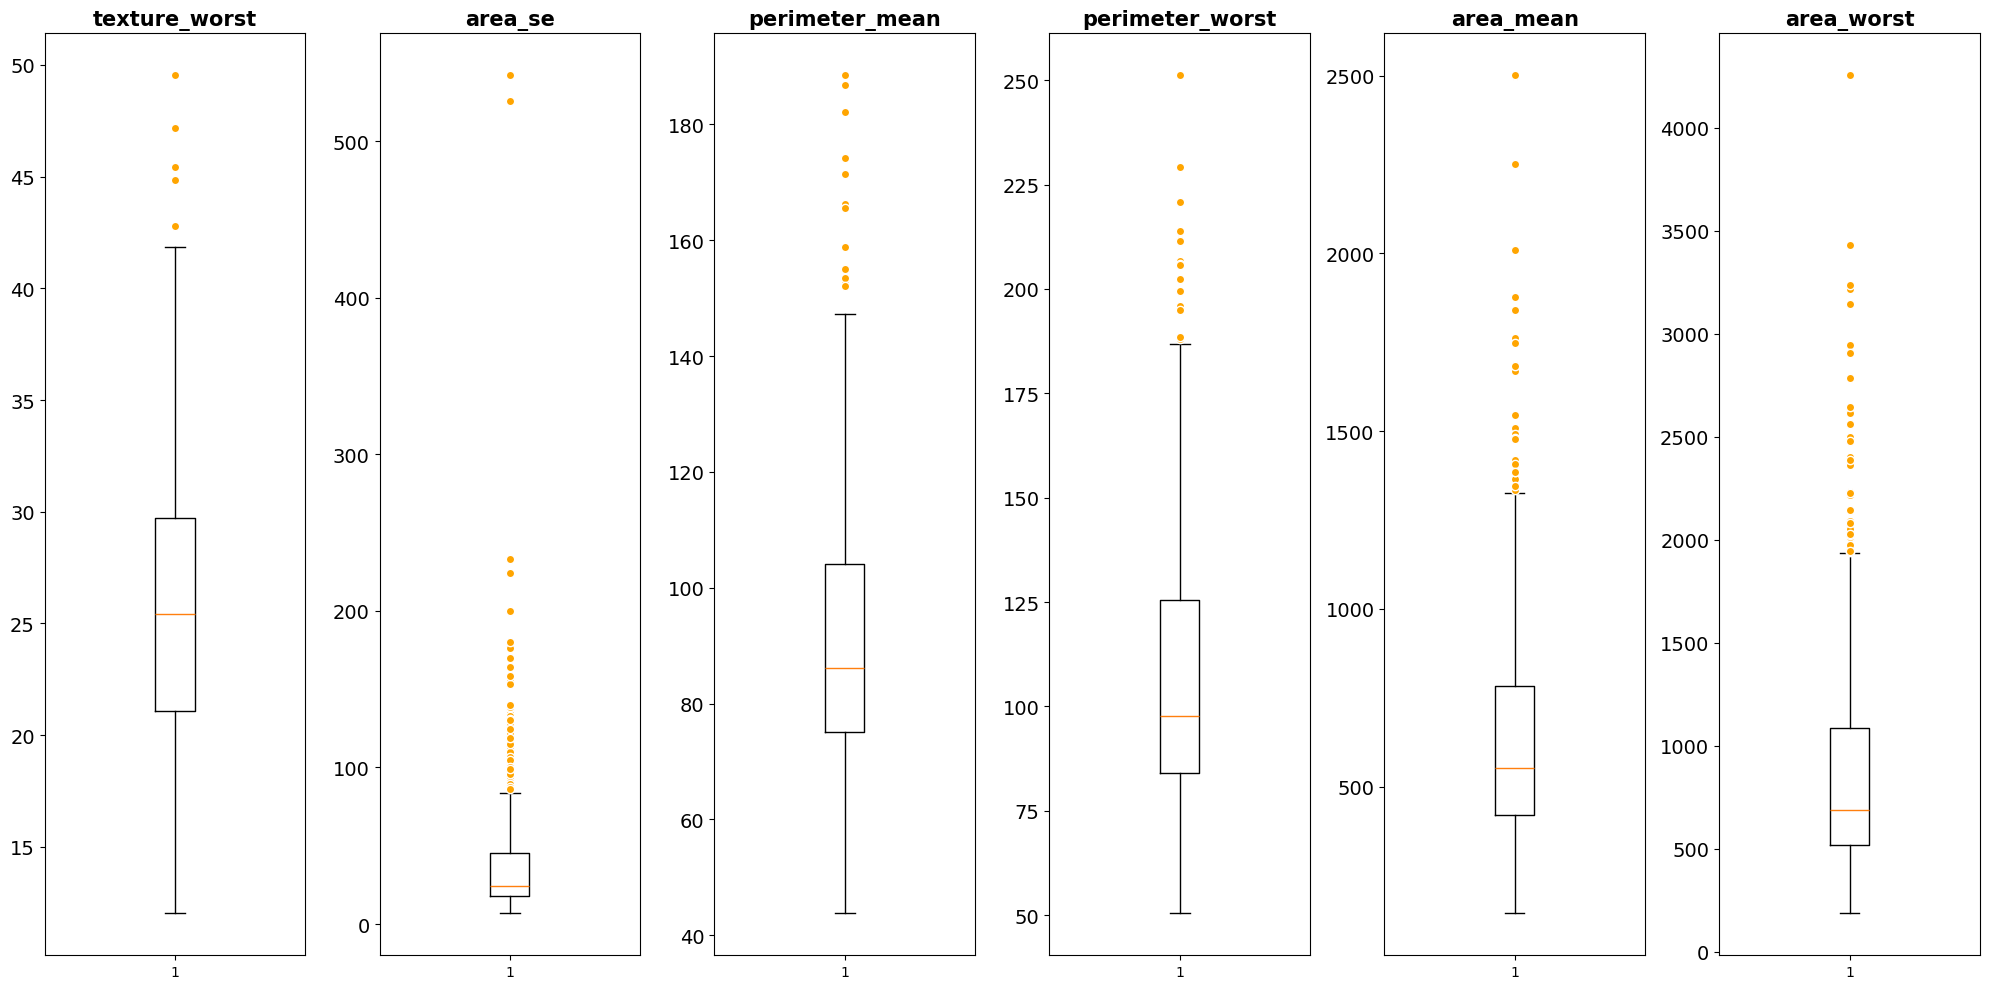

In [23]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(e.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(e.iloc[:,i], flierprops=orange_circle)
    ax.set_title(e.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [24]:
#find the limits - 1
upper_limit= dataset["fractal_dimension_se"].mean() + 3*dataset["fractal_dimension_se"].std()
lower_limit= dataset["fractal_dimension_se"].mean() - 3*dataset["fractal_dimension_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)


upper limit:  0.011733116767699923
lower limit:  -0.004143309034835247


In [25]:
#find the outliers
dataset.loc[(dataset["fractal_dimension_se"] > upper_limit) | (dataset["fractal_dimension_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,...,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,...,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.1305,0.13210,0.02168,...,9.092,29.72,58.08,249.8,0.16300,0.4310,0.5381,0.07879,0.3322,0.14860
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.1146,0.16820,0.06597,...,18.070,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818
290,89143602,B,14.410,19.73,96.03,651.0,0.08757,0.1676,0.13620,0.06602,...,15.770,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799
376,901315,B,10.570,20.22,70.15,338.3,0.09073,0.1660,0.22800,0.05941,...,10.850,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
388,903011,B,11.270,15.50,73.38,392.0,0.08365,0.1114,0.10070,0.02757,...,12.040,18.93,79.73,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430


In [26]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["fractal_dimension_se"] < upper_limit) & (dataset["fractal_dimension_se"] > lower_limit)]
print(" before remoing outliers of fractal_dimension_se :",len(dataset))
print(" after removing outliers of fractal_dimension_se :",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of fractal_dimension_se : 569
 after removing outliers of fractal_dimension_se : 559
outliers: 10


In [27]:
#find the limits -2
upper_limit= dataset["smoothness_se"].mean() + 3*dataset["smoothness_se"].std()
lower_limit= dataset["smoothness_se"].mean() - 3*dataset["smoothness_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.016048532741886265
lower limit:  -0.001966574921148128


In [28]:
#find the outliers
dataset.loc[(dataset["smoothness_se"] > upper_limit) | (dataset["smoothness_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,...,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,...,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,...,18.070,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
345,898677,B,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.880,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488
505,915276,B,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,...,10.600,18.04,69.47,328.1,0.2006,0.36630,0.29130,0.10750,0.2848,0.13640


In [29]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["smoothness_se"] < upper_limit) & (dataset["smoothness_se"] > lower_limit)]
print(" before remoing outliers of smoothness_se :",len(dataset))
print(" after removing outliers of smoothness_se :",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of smoothness_se : 569
 after removing outliers of smoothness_se : 562
outliers: 7


In [30]:
#find the limits - 3
upper_limit= dataset["concave points_se"].mean() + 3*dataset["concave points_se"].std()
lower_limit= dataset["concave points_se"].mean() - 3*dataset["concave points_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.030306992604741664
lower limit:  -0.006714718439539554


In [31]:
#find the outliers
dataset.loc[(dataset["concave points_se"] > upper_limit) | (dataset["concave points_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.0974,0.2458,0.20650,0.11180,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230
68,859471,B,9.029,17.33,58.79,250.5,0.1066,0.1413,0.31300,0.04375,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.17500,0.4228,0.11750
152,8710441,B,9.731,15.34,63.78,300.2,0.1072,0.1599,0.41080,0.07857,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.12590
213,881094802,M,17.420,25.56,114.50,948.0,0.1006,0.1146,0.16820,0.06597,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
288,8913049,B,11.260,19.96,73.72,394.1,0.0802,0.1181,0.09274,0.05588,...,11.86,22.33,78.27,437.6,0.1028,0.1843,0.1546,0.09314,0.2955,0.07009
389,90312,M,19.550,23.21,128.90,1174.0,0.1010,0.1318,0.18560,0.10210,...,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.18250,0.2576,0.07602


In [32]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["smoothness_se"] < upper_limit) & (dataset["smoothness_se"] > lower_limit)]
print(" before remoing outliers of smoothness_se :",len(dataset))
print(" after removing outliers of smoothness_se :",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of smoothness_se : 569
 after removing outliers of smoothness_se : 568
outliers: 1


In [33]:
#find the limits- 4
upper_limit= dataset["symmetry_se"].mean() + 3*dataset["symmetry_se"].std()
lower_limit= dataset["symmetry_se"].mean() - 3*dataset["symmetry_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.045341413356166725
lower limit:  -0.004256815816623669


In [34]:
#find the outliers  
dataset.loc[(dataset["symmetry_se"] > upper_limit) | (dataset["symmetry_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300
42,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,...,24.090,33.17,177.40,1651.0,0.1247,0.74440,0.7242,0.2493,0.4670,0.10380
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,...,23.370,31.72,170.30,1623.0,0.1639,0.61640,0.7681,0.2508,0.5440,0.09964
119,865128,M,17.950,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,...,20.580,27.83,129.20,1261.0,0.1072,0.12020,0.2249,0.1185,0.4882,0.06111
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,...,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.5803,0.2248,0.3222,0.08009
138,868826,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,18.550,21.43,121.40,971.4,0.1411,0.21640,0.3355,0.1667,0.3414,0.07147
146,869691,M,11.800,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,...,13.740,26.38,91.93,591.7,0.1385,0.40920,0.4504,0.1865,0.5774,0.10300
190,874858,M,14.220,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,...,15.740,37.18,106.40,762.4,0.1533,0.93270,0.8488,0.1772,0.5166,0.14460
212,8810703,M,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,...,28.110,18.47,188.50,2499.0,0.1142,0.15160,0.3201,0.1595,0.1648,0.05525
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.0000,0.3142,0.08116


In [35]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["symmetry_se"] < upper_limit) & (dataset["symmetry_se"] > lower_limit)]
print(" before remoing outliers of symmetry_se:",len(dataset))
print(" after removing outliers of symmetry_se:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of symmetry_se: 569
 after removing outliers of symmetry_se: 558
outliers: 11


In [36]:
#find the limits- 5
upper_limit= dataset["compactness_se"].mean() + 3*dataset["compactness_se"].std()
lower_limit= dataset["compactness_se"].mean() - 3*dataset["compactness_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.07920267681710247
lower limit:  -0.02824639913696187


In [37]:
#find the outliers  
dataset.loc[(dataset["compactness_se"] > upper_limit) | (dataset["compactness_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,...,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,...,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,...,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.42640,0.18230,...,28.400,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,...,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
190,874858,M,14.220,23.12,94.37,609.9,0.10750,0.2413,0.19810,0.06618,...,15.740,37.18,106.40,762.4,0.15330,0.9327,0.8488,0.17720,0.5166,0.14460
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.1146,0.16820,0.06597,...,18.070,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818


In [38]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["compactness_se"] < upper_limit) & (dataset["compactness_se"] > lower_limit)]
print(" before remoing outliers of compactness_se:",len(dataset))
print(" after removing outliers of compactness_se:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of compactness_se: 569
 after removing outliers of compactness_se: 557
outliers: 12


In [39]:
#find the limits- 6
upper_limit= dataset["concavity_se"].mean() + 3*dataset["concavity_se"].std()
lower_limit= dataset["concavity_se"].mean() - 3*dataset["concavity_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.1224518973134292
lower limit:  -0.05866446462450126


In [40]:
#find the outliers  
dataset.loc[(dataset["concavity_se"] > upper_limit) | (dataset["concavity_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,...,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,...,15.30,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,...,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,...,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.1146,0.1682,0.06597,...,18.07,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.1099,0.1603,0.06818
376,901315,B,10.570,20.22,70.15,338.3,0.09073,0.1660,0.2280,0.05941,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.1465,0.2597,0.12000


In [41]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["concavity_se"] < upper_limit) & (dataset["concavity_se"] > lower_limit)]
print(" before remoing outliers of concavity_se:",len(dataset))
print(" after removing outliers of concavity_se:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of concavity_se: 569
 after removing outliers of concavity_se: 563
outliers: 6


In [42]:
#find the limits- 7
upper_limit= dataset["concave points_mean"].mean() + 3*dataset["concave points_mean"].std()
lower_limit= dataset["concave points_mean"].mean() - 3*dataset["concave points_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.1653276804474081
lower limit:  -0.06748938870751353


In [43]:
#find the outliers  
dataset.loc[(dataset["concave points_mean"] > upper_limit) | (dataset["concave points_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [44]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["concave points_mean"] < upper_limit) & (dataset["concave points_mean"] > lower_limit)]
print(" before remoing outliers of concave points_mean:",len(dataset))
print(" after removing outliers of concave points_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of concave points_mean: 569
 after removing outliers of concave points_mean: 563
outliers: 6


In [45]:
#find the limits- 8
upper_limit= dataset["fractal_dimension_mean"].mean() + 3*dataset["fractal_dimension_mean"].std()
lower_limit= dataset["fractal_dimension_mean"].mean() - 3*dataset["fractal_dimension_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.08397869822708115
lower limit:  0.041616521456574386


In [46]:
#find the outliers  
dataset.loc[(dataset["fractal_dimension_mean"] > upper_limit) | (dataset["fractal_dimension_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.1730
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.1084
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,...,11.020,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.1259
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.1972,0.19750,0.04908,...,10.060,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.1055
376,901315,B,10.570,20.22,70.15,338.3,0.09073,0.1660,0.22800,0.05941,...,10.850,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.1200
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.2239,0.09730,0.05252,...,10.280,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.10250,0.3038,0.1252
505,915276,B,9.676,13.14,64.12,272.5,0.12550,0.2204,0.11880,0.07038,...,10.600,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.1364


In [47]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["fractal_dimension_mean"] < upper_limit) & (dataset["fractal_dimension_mean"] > lower_limit)]
print(" before remoing outliers of fractal_dimension_mean:",len(dataset))
print(" after removing outliers of fractal_dimension_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of fractal_dimension_mean: 569
 after removing outliers of fractal_dimension_mean: 562
outliers: 7


In [48]:
#find the limits- 9
upper_limit= dataset["fractal_dimension_worst"].mean() + 3*dataset["fractal_dimension_worst"].std()
lower_limit= dataset["fractal_dimension_worst"].mean() - 3*dataset["fractal_dimension_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.13812961926988054
lower limit:  0.02976201517651665


In [49]:
#find the outliers  
dataset.loc[(dataset["fractal_dimension_worst"] > upper_limit) | (dataset["fractal_dimension_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.1730
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,...,15.090,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.2075
14,84667401,M,13.730,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,...,15.030,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.1431
31,853612,M,11.840,18.70,77.93,440.6,0.11090,0.1516,0.1218,0.05182,...,16.820,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.1402
105,863030,M,13.110,15.56,87.21,530.2,0.13980,0.1765,0.2071,0.09601,...,16.310,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.19860,0.3147,0.1405
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.1305,0.1321,0.02168,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.1486
190,874858,M,14.220,23.12,94.37,609.9,0.10750,0.2413,0.1981,0.06618,...,15.740,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.17720,0.5166,0.1446
379,9013838,M,11.080,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,...,13.240,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.1403
562,925622,M,15.220,30.62,103.40,716.9,0.10480,0.2087,0.2550,0.09429,...,17.520,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.23560,0.4089,0.1409


In [50]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["fractal_dimension_worst"] < upper_limit) & (dataset["fractal_dimension_worst"] > lower_limit)]
print(" before remoing outliers of fractal_dimension_worst:",len(dataset))
print(" after removing outliers of fractal_dimension_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of fractal_dimension_worst: 569
 after removing outliers of fractal_dimension_worst: 560
outliers: 9


In [51]:
#find the limits- 10
upper_limit= dataset["concavity_mean"].mean() + 3*dataset["concavity_mean"].std()
lower_limit= dataset["concavity_mean"].mean() - 3*dataset["concavity_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.3279587419409037
lower limit:  -0.15036011030645727


In [52]:
#find the outliers  
dataset.loc[(dataset["concavity_mean"] > upper_limit) | (dataset["concavity_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,8610862,M,20.180,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.16040,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,25.220,24.91,171.50,1878.0,0.1063,0.2665,0.3339,0.18450,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.270,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.18230,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.250,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.20120,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
152,8710441,B,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.12590
202,878796,M,23.290,26.67,158.90,1685.0,0.1141,0.2084,0.3523,0.16200,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
352,899987,M,25.730,17.46,174.20,2010.0,0.1149,0.2363,0.3368,0.19130,...,33.13,23.58,229.30,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.420,26.27,186.90,2501.0,0.1084,0.1988,0.3635,0.16890,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
567,927241,M,20.600,29.33,140.10,1265.0,0.1178,0.2770,0.3514,0.15200,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [53]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["concavity_mean"] < upper_limit) & (dataset["concavity_mean"] > lower_limit)]
print(" before remoing outliers of concavity_mean:",len(dataset))
print(" after removing outliers of concavity_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of concavity_mean: 569
 after removing outliers of concavity_mean: 560
outliers: 9


In [54]:
#find the limits- 11
upper_limit= dataset["smoothness_mean"].mean() + 3*dataset["smoothness_mean"].std()
lower_limit= dataset["smoothness_mean"].mean() - 3*dataset["smoothness_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.13855266560809995
lower limit:  0.05416789678205824


In [55]:
#find the outliers  
dataset.loc[(dataset["smoothness_mean"] > upper_limit) | (dataset["smoothness_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
105,863030,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.2071,0.09601,...,16.310,22.40,106.40,827.2,0.18620,0.40990,0.6376,0.1986,0.3147,0.14050
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.4268,0.20120,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.5803,0.2248,0.3222,0.08009
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.0973,0.05252,...,10.280,16.38,69.05,300.2,0.19020,0.34410,0.2099,0.1025,0.3038,0.12520
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [56]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["smoothness_mean"] < upper_limit) & (dataset["smoothness_mean"] > lower_limit)]
print(" before remoing outliers of smoothness_mean:",len(dataset))
print(" after removing outliers of smoothness_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of smoothness_mean: 569
 after removing outliers of smoothness_mean: 564
outliers: 5


In [57]:
#find the limits- 12
upper_limit= dataset["compactness_mean"].mean() + 3*dataset["compactness_mean"].std()
lower_limit= dataset["compactness_mean"].mean() - 3*dataset["compactness_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.2627792579803134
lower limit:  -0.05409728961475979


In [58]:
#find the outliers  
dataset.loc[(dataset["compactness_mean"] > upper_limit) | (dataset["compactness_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
78,8610862,M,20.18,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.1604,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,25.22,24.91,171.50,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.1823,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
181,873593,M,21.09,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.1496,...,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840
258,887181,M,15.66,23.20,110.20,773.5,0.1109,0.3114,0.3176,0.1377,...,19.85,31.64,143.70,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
567,927241,M,20.60,29.33,140.10,1265.0,0.1178,0.2770,0.3514,0.1520,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [59]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["compactness_mean"] < upper_limit) & (dataset["compactness_mean"] > lower_limit)]
print(" before remoing outliers of compactness_mean:",len(dataset))
print(" after removing outliers of compactness_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of compactness_mean: 569
 after removing outliers of compactness_mean: 560
outliers: 9


In [60]:
#find the limits- 13
upper_limit= dataset["concave points_worst"].mean() + 3*dataset["concave points_worst"].std()
lower_limit= dataset["concave points_worst"].mean() - 3*dataset["concave points_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.31180324678642024
lower limit:  -0.0825908003892322


In [61]:
#find the outliers  
dataset.loc[(dataset["concave points_worst"] > upper_limit) | (dataset["concave points_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [62]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["concave points_worst"] < upper_limit) & (dataset["concave points_worst"] > lower_limit)]
print(" before remoing outliers of concave points_worst:",len(dataset))
print(" after removing outliers of concave points_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of concave points_worst: 569
 after removing outliers of concave points_worst: 569
outliers: 0


In [63]:
#find the limits- 14
upper_limit= dataset["smoothness_worst"].mean() + 3*dataset["smoothness_worst"].std()
lower_limit= dataset["smoothness_worst"].mean() - 3*dataset["smoothness_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.20086588223911098
lower limit:  0.06387130581009817


In [64]:
#find the outliers  
dataset.loc[(dataset["smoothness_worst"] > upper_limit) | (dataset["smoothness_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
203,87880,M,13.81,23.75,91.56,597.8,0.1323,0.1768,0.1558,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.1086
379,9013838,M,11.08,18.83,73.30,361.6,0.1216,0.2154,0.1689,0.06367,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.1403


In [65]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["smoothness_worst"] < upper_limit) & (dataset["smoothness_worst"] > lower_limit)]
print(" before remoing outliers of smoothness_worst:",len(dataset))
print(" after removing outliers of smoothness_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of smoothness_worst: 569
 after removing outliers of smoothness_worst: 566
outliers: 3


In [66]:
#find the limits- 15
upper_limit= dataset["symmetry_mean"].mean() + 3*dataset["symmetry_mean"].std()
lower_limit= dataset["symmetry_mean"].mean() - 3*dataset["symmetry_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.2634047069255061
lower limit:  0.09891901890929179


In [67]:
#find the outliers  
dataset.loc[(dataset["symmetry_mean"] > upper_limit) | (dataset["symmetry_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
25,852631,M,17.14,16.40,116.00,912.7,0.1186,0.22760,0.22290,0.14010,...,22.25,21.40,152.40,1461.0,0.1545,0.39490,0.38530,0.25500,0.4066,0.10590
60,858970,B,10.17,14.88,64.55,311.9,0.1134,0.08061,0.01084,0.01290,...,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
78,8610862,M,20.18,23.97,143.70,1245.0,0.1286,0.34540,0.37540,0.16040,...,23.37,31.72,170.30,1623.0,0.1639,0.61640,0.76810,0.25080,0.5440,0.09964
122,865423,M,24.25,20.20,166.20,1761.0,0.1447,0.28670,0.42680,0.20120,...,26.02,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
146,869691,M,11.80,16.58,78.99,432.0,0.1091,0.17000,0.16590,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300


In [68]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["symmetry_mean"] < upper_limit) & (dataset["symmetry_mean"] > lower_limit)]
print(" before remoing outliers of symmetry_mean:",len(dataset))
print(" after removing outliers of symmetry_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of symmetry_mean: 569
 after removing outliers of symmetry_mean: 564
outliers: 5


In [69]:
#find the limits- 16
upper_limit= dataset["compactness_worst"].mean() + 3*dataset["compactness_worst"].std()
lower_limit= dataset["compactness_worst"].mean() - 3*dataset["compactness_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.7262745106779571
lower limit:  -0.21774442280449485


In [70]:
#find the outliers  
dataset.loc[(dataset["compactness_worst"] > upper_limit) | (dataset["compactness_worst"] < lower_limit)]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075
14,84667401,M,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.1431
42,855625,M,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.2107,0.09961,...,24.09,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.1038
72,859717,M,17.20,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,...,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.1339
181,873593,M,21.09,26.57,142.70,1311.0,0.11410,0.2832,0.2487,0.14960,...,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.1284
190,874858,M,14.22,23.12,94.37,609.9,0.10750,0.2413,0.1981,0.06618,...,15.74,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.1446
379,9013838,M,11.08,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.1403
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.2087,0.2550,0.09429,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.1409
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.2770,0.3514,0.15200,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.1240


In [71]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["compactness_worst"] < upper_limit) & (dataset["compactness_worst"] > lower_limit)]
print(" before remoing outliers of compactness_worst:",len(dataset))
print(" after removing outliers of compactness_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))


 before remoing outliers of compactness_worst: 569
 after removing outliers of compactness_worst: 559
outliers: 10


In [72]:
#find the limits- 17
upper_limit= dataset["concavity_worst"].mean() + 3*dataset["concavity_worst"].std()
lower_limit= dataset["concavity_worst"].mean() - 3*dataset["concavity_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.8980613251284391
lower limit:  -0.3536843585203547


In [73]:
#find the outliers  
dataset.loc[(dataset["concavity_worst"] > upper_limit) | (dataset["concavity_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.11750
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
400,90439701,M,17.910,21.02,124.40,994.0,0.12300,0.2576,0.3189,0.11980,...,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980
430,907914,M,14.900,22.53,102.10,685.0,0.09947,0.2225,0.2733,0.09711,...,16.35,27.57,125.40,832.7,0.1419,0.7090,0.9019,0.2475,0.2866,0.11550
562,925622,M,15.220,30.62,103.40,716.9,0.10480,0.2087,0.2550,0.09429,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090
567,927241,M,20.600,29.33,140.10,1265.0,0.11780,0.2770,0.3514,0.15200,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [74]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["concavity_worst"] < upper_limit) & (dataset["concavity_worst"] > lower_limit)]
print(" before remoing outliers of concavity_worst:",len(dataset))
print(" after removing outliers of concavity_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of concavity_worst: 569
 after removing outliers of concavity_worst: 562
outliers: 7


In [75]:
#find the limits- 18
upper_limit= dataset["symmetry_worst"].mean() + 3*dataset["symmetry_worst"].std()
lower_limit= dataset["symmetry_worst"].mean() - 3*dataset["symmetry_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.47567797379006044
lower limit:  0.10447316856494832


In [76]:
#find the outliers  
dataset.loc[(dataset["symmetry_worst"] > upper_limit) | (dataset["symmetry_worst"] < lower_limit)]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
31,853612,M,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.1546,0.4761,0.14020
35,854253,M,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,...,20.01,29.02,133.50,1229.0,0.1563,0.3835,0.5409,0.1813,0.4863,0.08633
78,8610862,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
119,865128,M,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,...,20.58,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.1185,0.4882,0.06111
146,869691,M,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.4504,0.1865,0.5774,0.10300
190,874858,M,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,...,15.74,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460
323,895100,M,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,...,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.5344,0.2685,0.5558,0.10240
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.7087,0.2248,0.4824,0.09614


In [77]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["symmetry_worst"] < upper_limit) & (dataset["symmetry_worst"] > lower_limit)]
print(" before remoing outliers of symmetry_worst:",len(dataset))
print(" after removing outliers of symmetry_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of symmetry_worst: 569
 after removing outliers of symmetry_worst: 560
outliers: 9


In [78]:
#find the limits- 19
upper_limit= dataset["radius_se"].mean() + 3*dataset["radius_se"].std()
lower_limit= dataset["radius_se"].mean() - 3*dataset["radius_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  1.2371102551973276
lower limit:  -0.426766142719296


In [79]:
#find the outliers  
dataset.loc[(dataset["radius_se"] > upper_limit) | (dataset["radius_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
122,865423,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
138,868826,M,14.95,17.57,96.85,678.1,0.11670,0.1305,0.1539,0.08624,...,18.55,21.43,121.4,971.4,0.1411,0.2164,0.3355,0.1667,0.3414,0.07147
212,8810703,M,28.11,18.47,188.50,2499.0,0.11420,0.1516,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
258,887181,M,15.66,23.20,110.20,773.5,0.11090,0.3114,0.3176,0.13770,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
417,90602302,M,15.50,21.08,102.90,803.1,0.11200,0.1571,0.1522,0.08481,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
461,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.1988,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.10,1682.0,0.09342,0.1275,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


In [80]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["radius_se"] < upper_limit) & (dataset["radius_se"] > lower_limit)]
print(" before remoing outliers of radius_se:",len(dataset))
print(" after removing outliers of radius_se:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of radius_se: 569
 after removing outliers of radius_se: 562
outliers: 7


In [81]:
#find the limits- 20
upper_limit= dataset["texture_se"].mean() + 3*dataset["texture_se"].std()
lower_limit= dataset["texture_se"].mean() - 3*dataset["texture_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  2.8717986049166333
lower limit:  -0.43809175078658047


In [82]:
#find the outliers  
dataset.loc[(dataset["texture_se"] > upper_limit) | (dataset["texture_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,...,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
83,8611792,M,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,...,20.330,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
416,905978,B,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,...,10.850,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [83]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["texture_se"] < upper_limit) & (dataset["texture_se"] > lower_limit)]
print(" before remoing outliers of texture_se:",len(dataset))
print(" after removing outliers of texture_se:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of texture_se: 569
 after removing outliers of texture_se: 560
outliers: 9


In [84]:
#find the limits- 21
upper_limit= dataset["perimeter_se"].mean() + 3*dataset["perimeter_se"].std()
lower_limit= dataset["perimeter_se"].mean() - 3*dataset["perimeter_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  8.931622888839856
lower limit:  -3.19950443541279


In [85]:
#find the outliers  
dataset.loc[(dataset["perimeter_se"] > upper_limit) | (dataset["perimeter_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.17,24.80,132.4,1123.0,0.09740,0.2458,0.2065,0.11180,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
258,887181,M,15.66,23.20,110.2,773.5,0.11090,0.3114,0.3176,0.13770,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
417,90602302,M,15.50,21.08,102.9,803.1,0.11200,0.1571,0.1522,0.08481,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.1275,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


In [86]:
#find the outliers  
dataset.loc[(dataset["perimeter_se"] > upper_limit) | (dataset["perimeter_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.17,24.80,132.4,1123.0,0.09740,0.2458,0.2065,0.11180,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
258,887181,M,15.66,23.20,110.2,773.5,0.11090,0.3114,0.3176,0.13770,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
417,90602302,M,15.50,21.08,102.9,803.1,0.11200,0.1571,0.1522,0.08481,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.1275,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


In [87]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["perimeter_se"] < upper_limit) & (dataset["perimeter_se"] > lower_limit)]
print(" before remoing outliers of perimeter_se:",len(dataset))
print(" after removing outliers of perimeter_se:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of perimeter_se: 569
 after removing outliers of perimeter_se: 561
outliers: 8


In [88]:
#find the limits- 22
upper_limit= dataset["radius_mean"].mean() + 3*dataset["radius_mean"].std()
lower_limit= dataset["radius_mean"].mean() - 3*dataset["radius_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  24.699438218530787
lower limit:  3.5551452612583194


In [89]:
#find the outliers  
dataset.loc[(dataset["radius_mean"] > upper_limit) | (dataset["radius_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [90]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["radius_mean"] < upper_limit) & (dataset["radius_mean"] > lower_limit)]
print(" before remoing outliers of radius_mean:",len(dataset))
print(" after removing outliers of radius_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of radius_mean: 569
 after removing outliers of radius_mean: 564
outliers: 5


In [91]:
#find the limits- 23
upper_limit= dataset["radius_worst"].mean() + 3*dataset["radius_worst"].std()
lower_limit= dataset["radius_worst"].mean() - 3*dataset["radius_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  30.768914548086357
lower limit:  1.769465065270417


In [92]:
#find the outliers  
dataset.loc[(dataset["radius_worst"] > upper_limit) | (dataset["radius_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.1275,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


In [93]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["radius_worst"] < upper_limit) & (dataset["radius_worst"] > lower_limit)]
print(" before remoing outliers of radius_worst:",len(dataset))
print(" after removing outliers of radius_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of radius_worst: 569
 after removing outliers of radius_worst: 563
outliers: 6


In [94]:
#find the limits- 24
upper_limit= dataset["texture_mean"].mean() + 3*dataset["texture_mean"].std()
lower_limit= dataset["texture_mean"].mean() - 3*dataset["texture_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  32.19275581065199
lower limit:  6.386541201650294


In [95]:
#find the outliers  
dataset.loc[(dataset["texture_mean"] > upper_limit) | (dataset["texture_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,M,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,...,27.90,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
232,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
239,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
259,88725602,M,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,...,18.49,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040


In [96]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["texture_mean"] < upper_limit) & (dataset["texture_mean"] > lower_limit)]
print(" before remoing outliers of texture_mean:",len(dataset))
print(" after removing outliers of texture_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of texture_mean: 569
 after removing outliers of texture_mean: 565
outliers: 4


In [97]:
#find the limits- 25
upper_limit= dataset["texture_worst"].mean() + 3*dataset["texture_worst"].std()
lower_limit= dataset["texture_worst"].mean() - 3*dataset["texture_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  44.11599606770898
lower limit:  7.238450329479068


In [98]:
#find the outliers  
dataset.loc[(dataset["texture_worst"] > upper_limit) | (dataset["texture_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,M,19.53,32.47,128.0,1223.0,0.08420,0.1130,0.1145,0.06637,...,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
239,88330202,M,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,...,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496
259,88725602,M,15.53,33.56,103.7,744.9,0.10630,0.1639,0.1751,0.08399,...,18.49,49.54,126.3,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218


In [99]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["texture_worst"] < upper_limit) & (dataset["texture_worst"] > lower_limit)]
print(" before remoing outliers of texture_worst:",len(dataset))
print(" after removing outliers of texture_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of texture_worst: 569
 after removing outliers of texture_worst: 565
outliers: 4


In [100]:
#find the limits- 25
upper_limit= dataset["area_se"].mean() + 3*dataset["area_se"].std()
lower_limit= dataset["area_se"].mean() - 3*dataset["area_se"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  176.81009563451144
lower limit:  -96.13593746227943


In [101]:
#find the outliers  
dataset.loc[(dataset["area_se"] > upper_limit) | (dataset["area_se"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
368,9011971,M,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,...,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


In [102]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["area_se"] < upper_limit) & (dataset["area_se"] > lower_limit)]
print(" before remoing outliers of area_se:",len(dataset))
print(" after removing outliers of area_se:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of area_se: 569
 after removing outliers of area_se: 563
outliers: 6


In [103]:
#find the limits- 26
upper_limit= dataset["perimeter_mean"].mean() + 3*dataset["perimeter_mean"].std()
lower_limit= dataset["perimeter_mean"].mean() - 3*dataset["perimeter_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  164.86597650818038
lower limit:  19.072090275650922


In [104]:
#find the outliers  
dataset.loc[(dataset["perimeter_mean"] > upper_limit) | (dataset["perimeter_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
122,865423,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
521,91762702,M,24.63,21.60,165.5,1841.0,0.1030,0.2106,0.2310,0.1471,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


In [105]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["perimeter_mean"] < upper_limit) & (dataset["perimeter_mean"] > lower_limit)]
print(" before remoing outliers of perimeter_mean:",len(dataset))
print(" after removing outliers of perimeter_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of perimeter_mean: 569
 after removing outliers of perimeter_mean: 562
outliers: 7


In [106]:
#find the limits- 27
upper_limit= dataset["perimeter_worst"].mean() + 3*dataset["perimeter_worst"].std()
lower_limit= dataset["perimeter_worst"].mean() - 3*dataset["perimeter_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  208.06883946088766
lower limit:  6.4535858466694975


In [107]:
#find the outliers  
dataset.loc[(dataset["perimeter_worst"] > upper_limit) | (dataset["perimeter_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.1275,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


In [108]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["perimeter_worst"] < upper_limit) & (dataset["perimeter_worst"] > lower_limit)]
print(" before remoing outliers of perimeter_worst:",len(dataset))
print(" after removing outliers of perimeter_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of perimeter_worst: 569
 after removing outliers of perimeter_worst: 563
outliers: 6


In [109]:
#find the limits- 28
upper_limit= dataset["area_mean"].mean() + 3*dataset["area_mean"].std()
lower_limit= dataset["area_mean"].mean() - 3*dataset["area_mean"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  1710.6314912356445
lower limit:  -400.8532838542735


In [110]:
#find the outliers  
dataset.loc[(dataset["area_mean"] > upper_limit) | (dataset["area_mean"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
122,865423,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
339,89812,M,23.51,24.27,155.1,1747.0,0.1069,0.1283,0.2308,0.1410,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
521,91762702,M,24.63,21.60,165.5,1841.0,0.1030,0.2106,0.2310,0.1471,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


In [111]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["area_mean"] < upper_limit) & (dataset["area_mean"] > lower_limit)]
print(" before remoing outliers of area_mean:",len(dataset))
print(" after removing outliers of area_mean:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of area_mean: 569
 after removing outliers of area_mean: 561
outliers: 8


In [112]:
#find the limits- 29
upper_limit= dataset["area_worst"].mean() + 3*dataset["area_worst"].std()
lower_limit= dataset["area_worst"].mean() - 3*dataset["area_worst"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  2588.654106305102
lower limit:  -827.4878497145922


In [113]:
#find the outliers  
dataset.loc[(dataset["area_worst"] > upper_limit) | (dataset["area_worst"] < lower_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
368,9011971,M,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,...,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277
521,91762702,M,24.63,21.60,165.5,1841.0,0.10300,0.21060,0.2310,0.14710,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


In [114]:
#trimming - delete the outlier data
new_dataset=dataset.loc[(dataset["area_worst"] < upper_limit) & (dataset["area_worst"] > lower_limit)]
print(" before remoing outliers of area_worst:",len(dataset))
print(" after removing outliers of area_worst:",len(new_dataset))
print("outliers:", len(dataset)- len(new_dataset))

 before remoing outliers of area_worst: 569
 after removing outliers of area_worst: 559
outliers: 10


In [115]:
m=new_dataset[["fractal_dimension_se","smoothness_se","concave points_se","symmetry_se","compactness_se","concavity_se"]]

In [116]:
m

,fractal_dimension_se,smoothness_se,concave points_se,symmetry_se,compactness_se,concavity_se
0,0.006193,0.006399,0.01587,0.03003,0.04904,0.05373
1,0.003532,0.005225,0.01340,0.01389,0.01308,0.01860
2,0.004571,0.006150,0.02058,0.02250,0.04006,0.03832
3,0.009208,0.009110,0.01867,0.05963,0.07458,0.05661
4,0.005115,0.011490,0.01885,0.01756,0.02461,0.05688
...,...,...,...,...,...,...
564,0.004239,0.010300,0.02454,0.01114,0.02891,0.05198
565,0.002498,0.005769,0.01678,0.01898,0.02423,0.03950
566,0.003892,0.005903,0.01557,0.01318,0.03731,0.04730
567,0.006185,0.006522,0.01664,0.02324,0.06158,0.07117


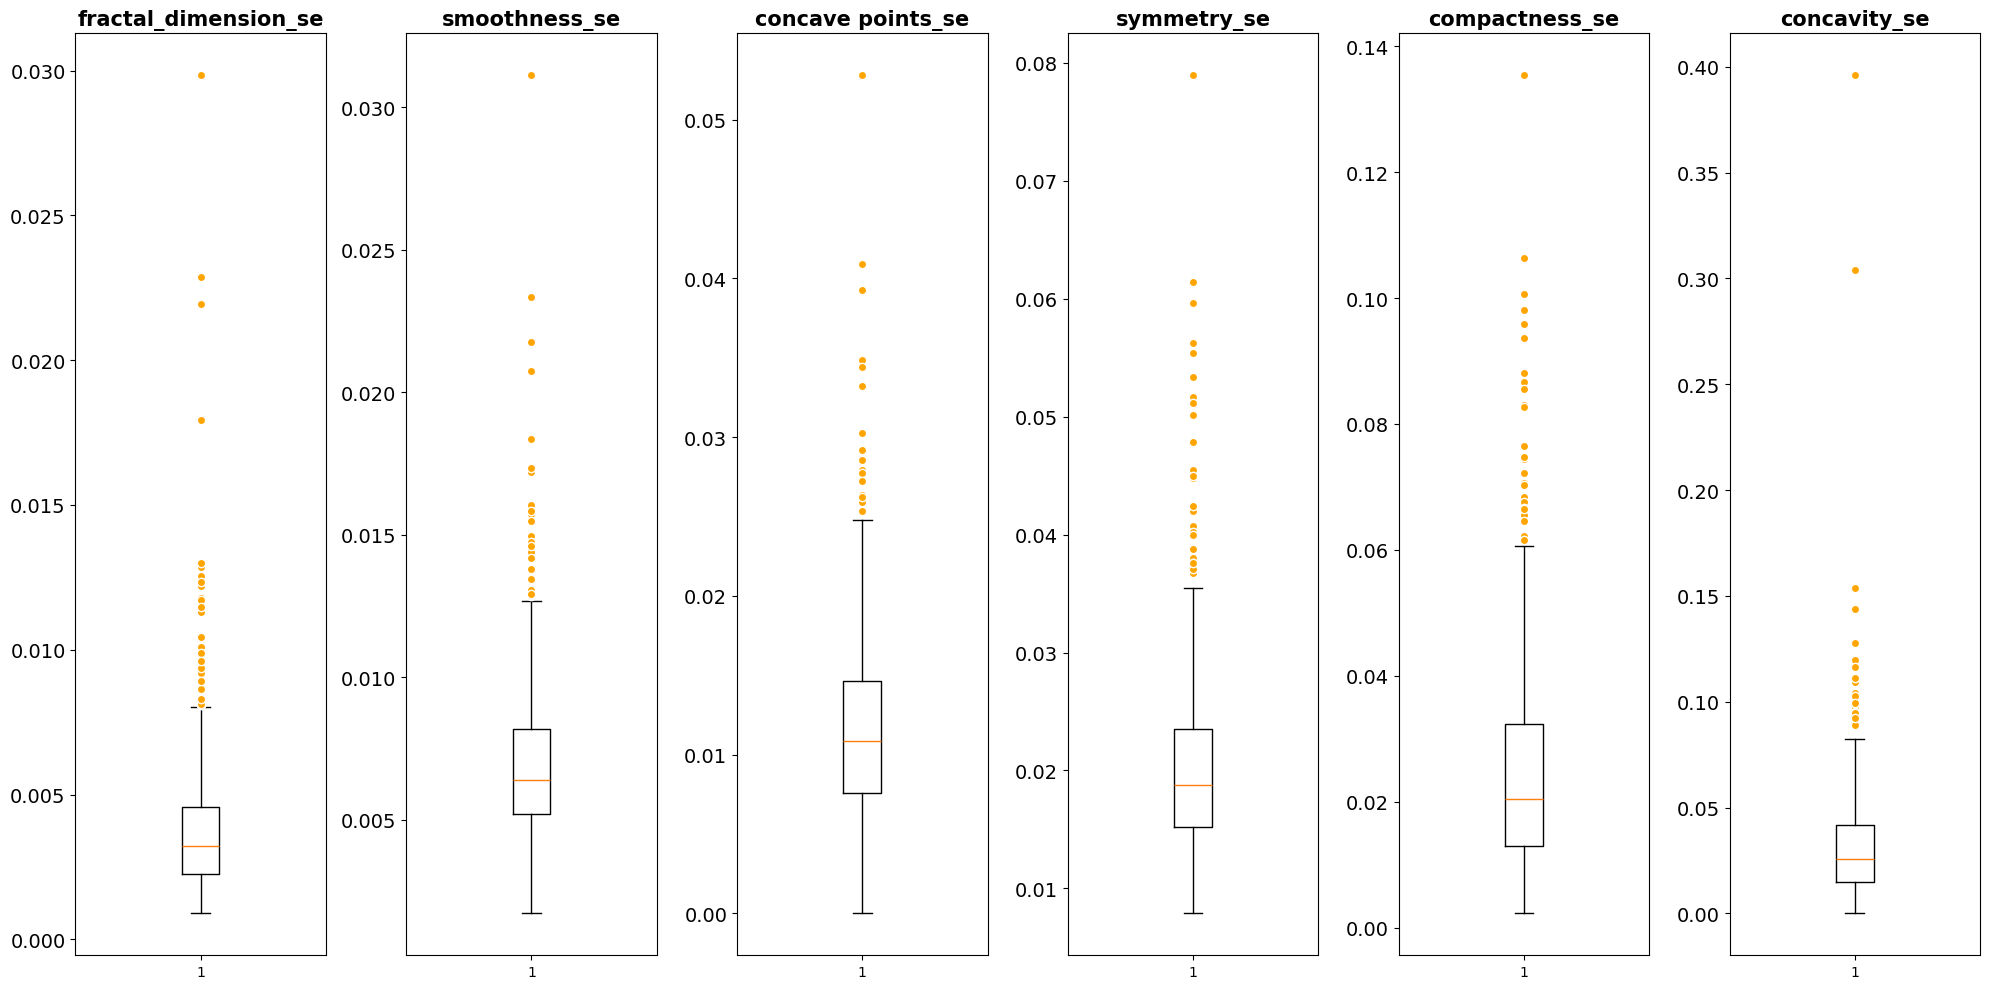

In [117]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(m.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(m.iloc[:,i], flierprops=orange_circle)
    ax.set_title(m.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [118]:
n=new_dataset[["concave points_mean",
"fractal_dimension_mean",
"fractal_dimension_worst",
"concavity_mean",
"smoothness_mean",
"compactness_mean"
]]

In [119]:
n

,concave points_mean,fractal_dimension_mean,fractal_dimension_worst,concavity_mean,smoothness_mean,compactness_mean
0,0.14710,0.07871,0.11890,0.30010,0.11840,0.27760
1,0.07017,0.05667,0.08902,0.08690,0.08474,0.07864
2,0.12790,0.05999,0.08758,0.19740,0.10960,0.15990
3,0.10520,0.09744,0.17300,0.24140,0.14250,0.28390
4,0.10430,0.05883,0.07678,0.19800,0.10030,0.13280
...,...,...,...,...,...,...
564,0.13890,0.05623,0.07115,0.24390,0.11100,0.11590
565,0.09791,0.05533,0.06637,0.14400,0.09780,0.10340
566,0.05302,0.05648,0.07820,0.09251,0.08455,0.10230
567,0.15200,0.07016,0.12400,0.35140,0.11780,0.27700


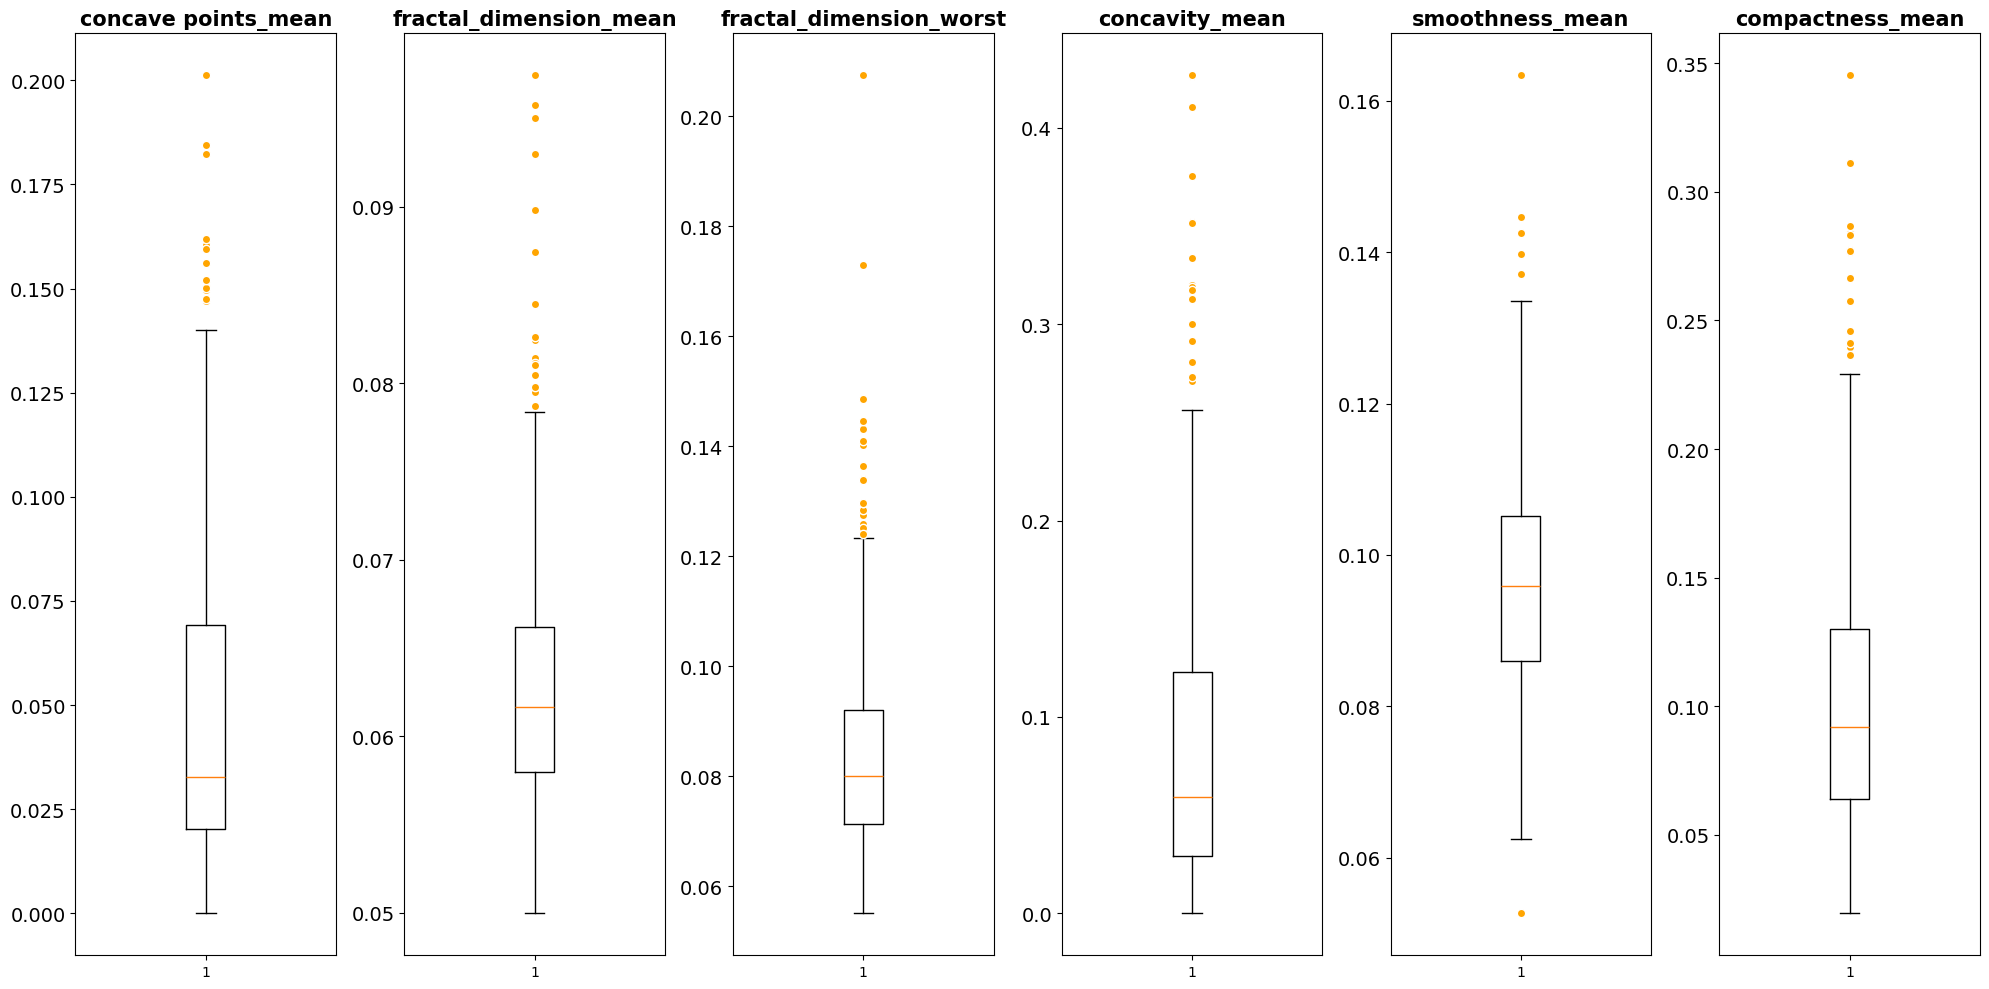

In [120]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(n.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(n.iloc[:,i], flierprops=orange_circle)
    ax.set_title(n.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [121]:
o=new_dataset[["concave points_worst",
"smoothness_worst",
"symmetry_mean",
"compactness_worst",
"concavity_worst",
"symmetry_worst"
]]

In [122]:
o

,concave points_worst,smoothness_worst,symmetry_mean,compactness_worst,concavity_worst,symmetry_worst
0,0.2654,0.16220,0.2419,0.66560,0.7119,0.4601
1,0.1860,0.12380,0.1812,0.18660,0.2416,0.2750
2,0.2430,0.14440,0.2069,0.42450,0.4504,0.3613
3,0.2575,0.20980,0.2597,0.86630,0.6869,0.6638
4,0.1625,0.13740,0.1809,0.20500,0.4000,0.2364
...,...,...,...,...,...,...
564,0.2216,0.14100,0.1726,0.21130,0.4107,0.2060
565,0.1628,0.11660,0.1752,0.19220,0.3215,0.2572
566,0.1418,0.11390,0.1590,0.30940,0.3403,0.2218
567,0.2650,0.16500,0.2397,0.86810,0.9387,0.4087


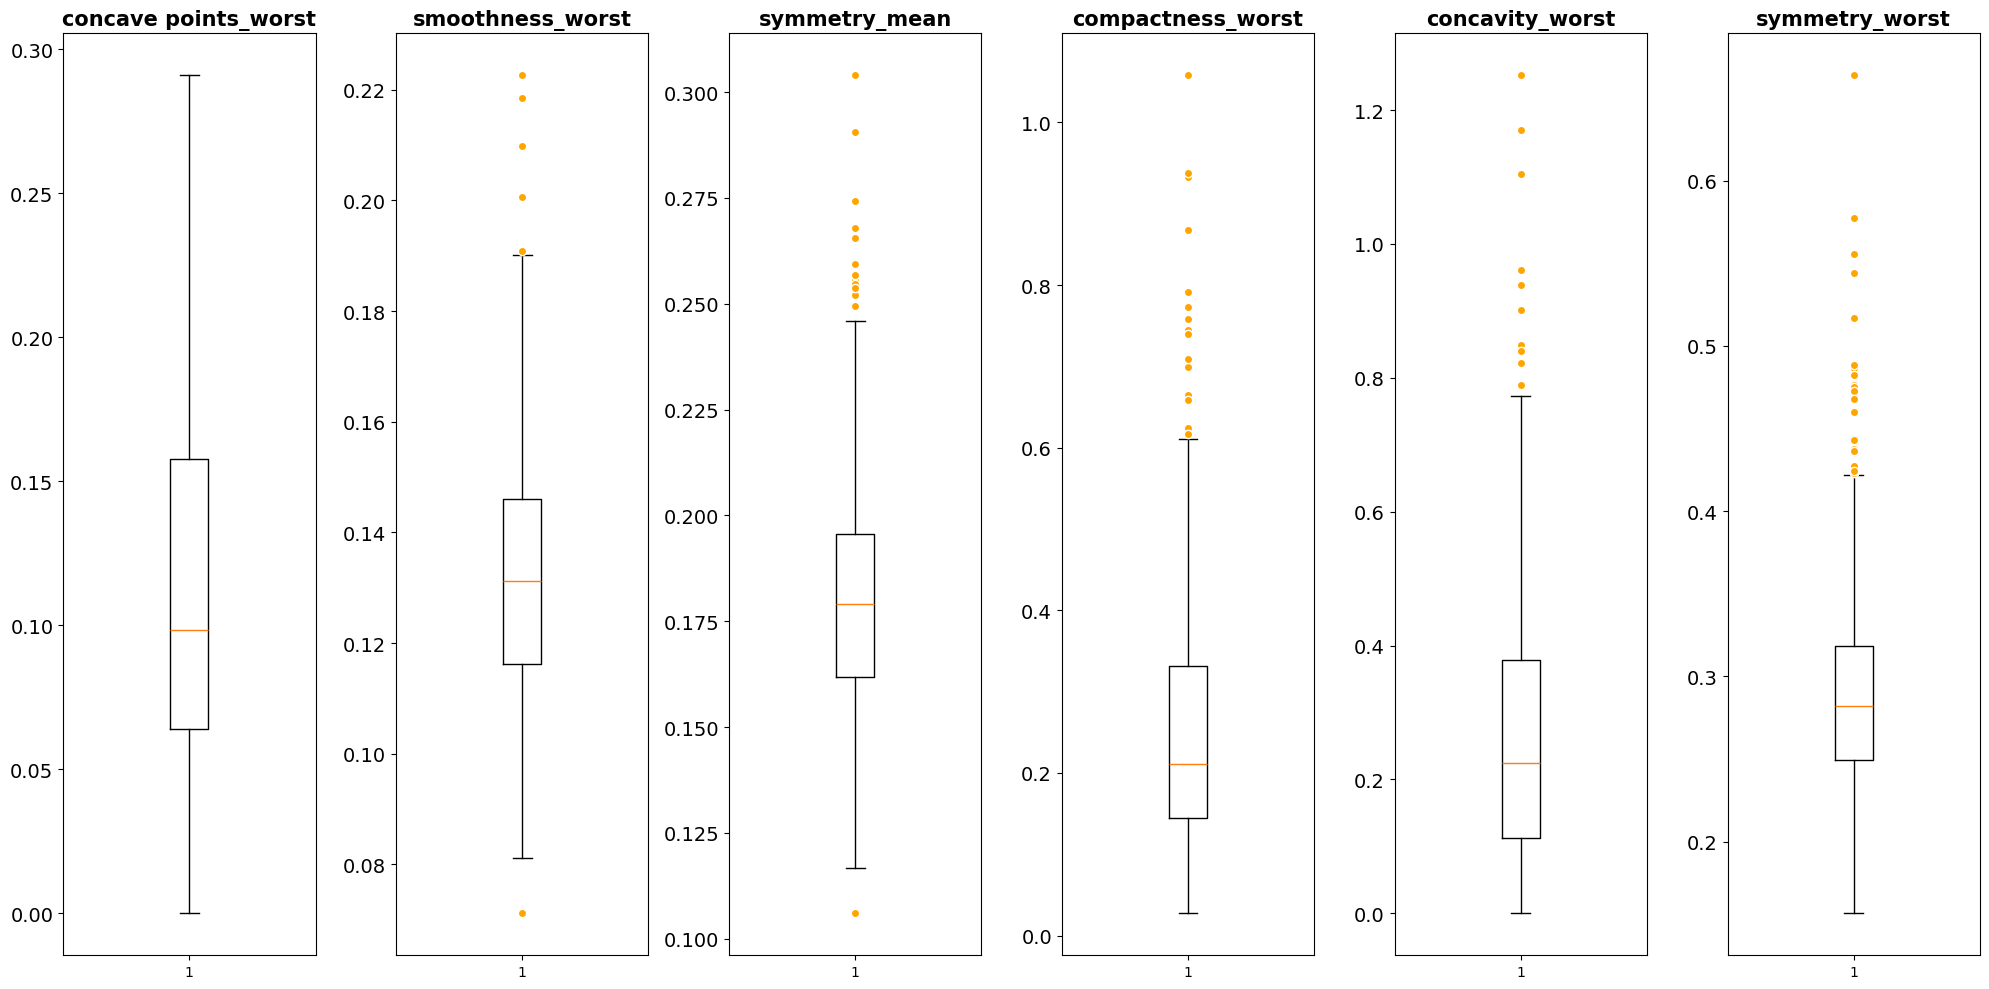

In [123]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(o.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(o.iloc[:,i], flierprops=orange_circle)
    ax.set_title(o.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [124]:
p=new_dataset[["radius_se",
"texture_se",
"perimeter_se",
"radius_mean",
"radius_worst",
"texture_mean"
]]

In [125]:
p

,radius_se,texture_se,perimeter_se,radius_mean,radius_worst,texture_mean
0,1.0950,0.9053,8.589,17.99,25.380,10.38
1,0.5435,0.7339,3.398,20.57,24.990,17.77
2,0.7456,0.7869,4.585,19.69,23.570,21.25
3,0.4956,1.1560,3.445,11.42,14.910,20.38
4,0.7572,0.7813,5.438,20.29,22.540,14.34
...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,21.56,25.450,22.39
565,0.7655,2.4630,5.203,20.13,23.690,28.25
566,0.4564,1.0750,3.425,16.60,18.980,28.08
567,0.7260,1.5950,5.772,20.60,25.740,29.33


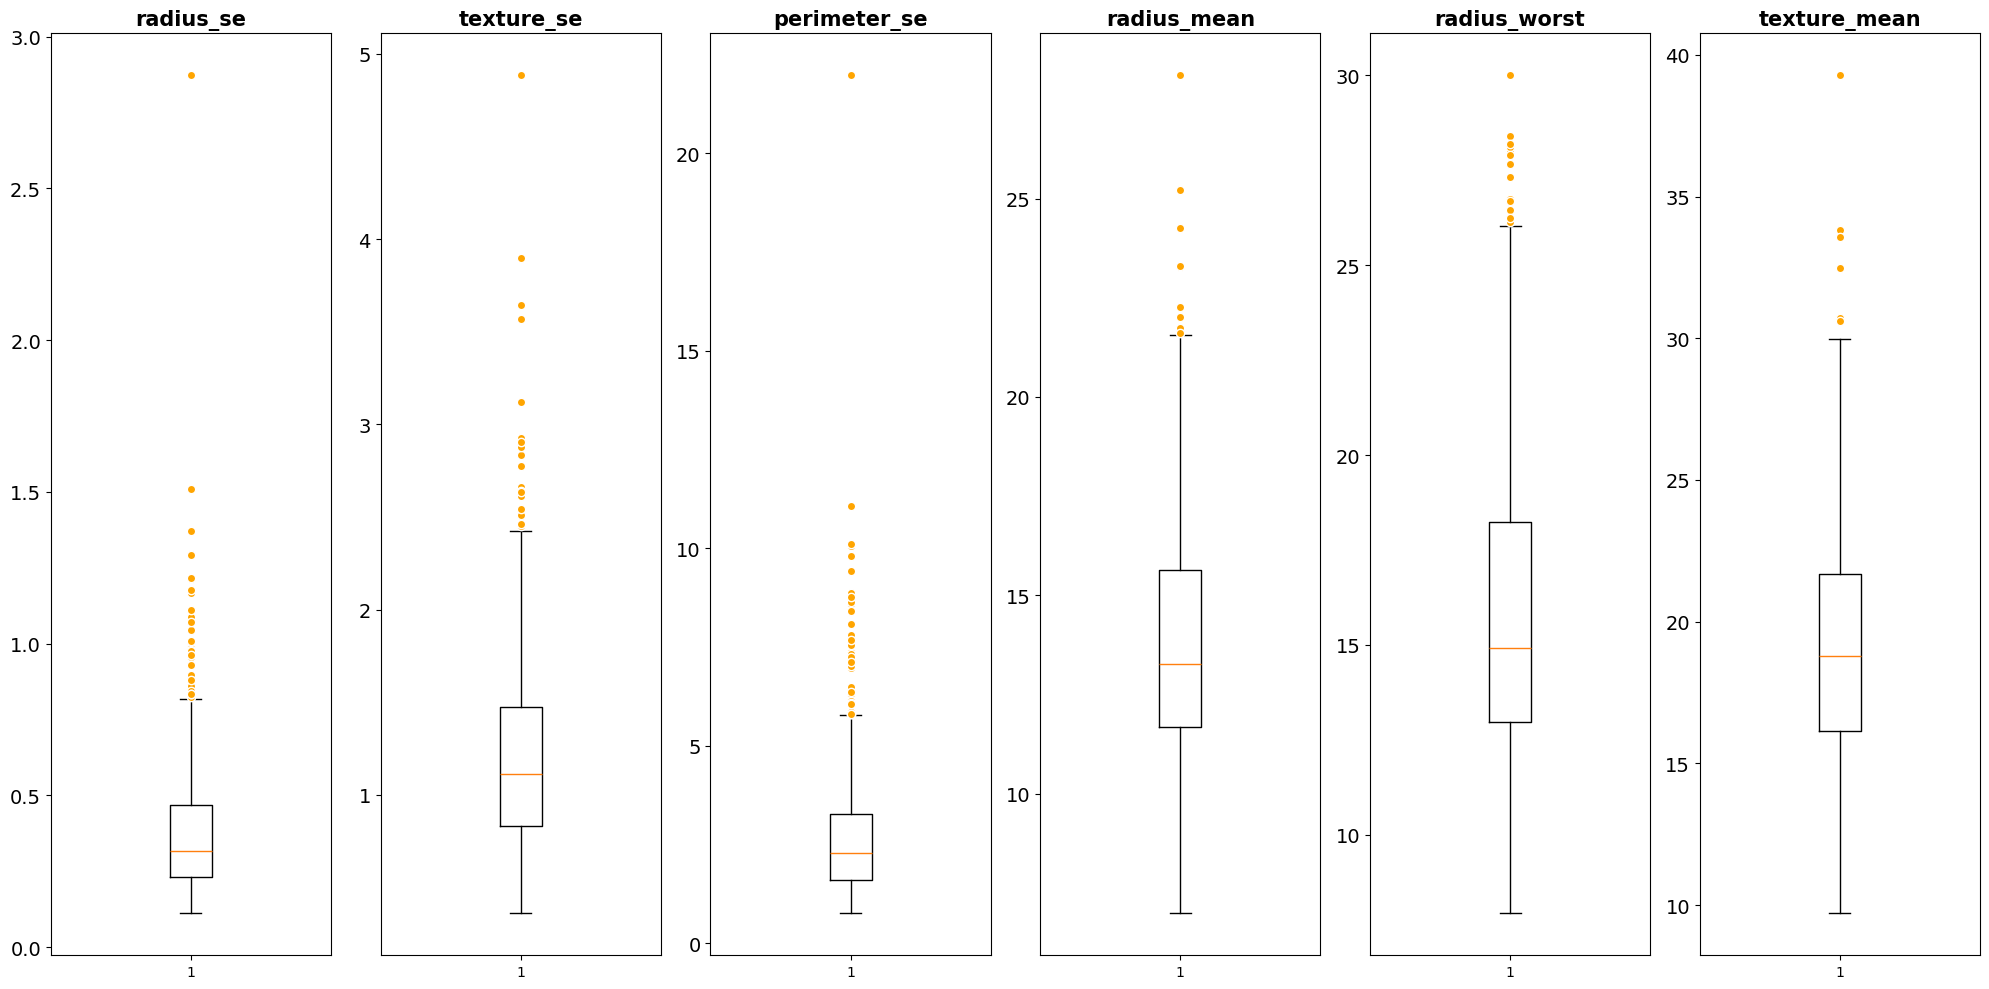

In [126]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(p.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(p.iloc[:,i], flierprops=orange_circle)
    ax.set_title(p.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [127]:
q=dataset[["texture_worst",
"area_se",
"perimeter_mean",
"perimeter_worst",
"area_mean",
"area_worst"
]]

In [128]:
q

,texture_worst,area_se,perimeter_mean,perimeter_worst,area_mean,area_worst
0,17.33,153.40,122.80,184.60,1001.0,2019.0
1,23.41,74.08,132.90,158.80,1326.0,1956.0
2,25.53,94.03,130.00,152.50,1203.0,1709.0
3,26.50,27.23,77.58,98.87,386.1,567.7
4,16.67,94.44,135.10,152.20,1297.0,1575.0
...,...,...,...,...,...,...
564,26.40,158.70,142.00,166.10,1479.0,2027.0
565,38.25,99.04,131.20,155.00,1261.0,1731.0
566,34.12,48.55,108.30,126.70,858.1,1124.0
567,39.42,86.22,140.10,184.60,1265.0,1821.0


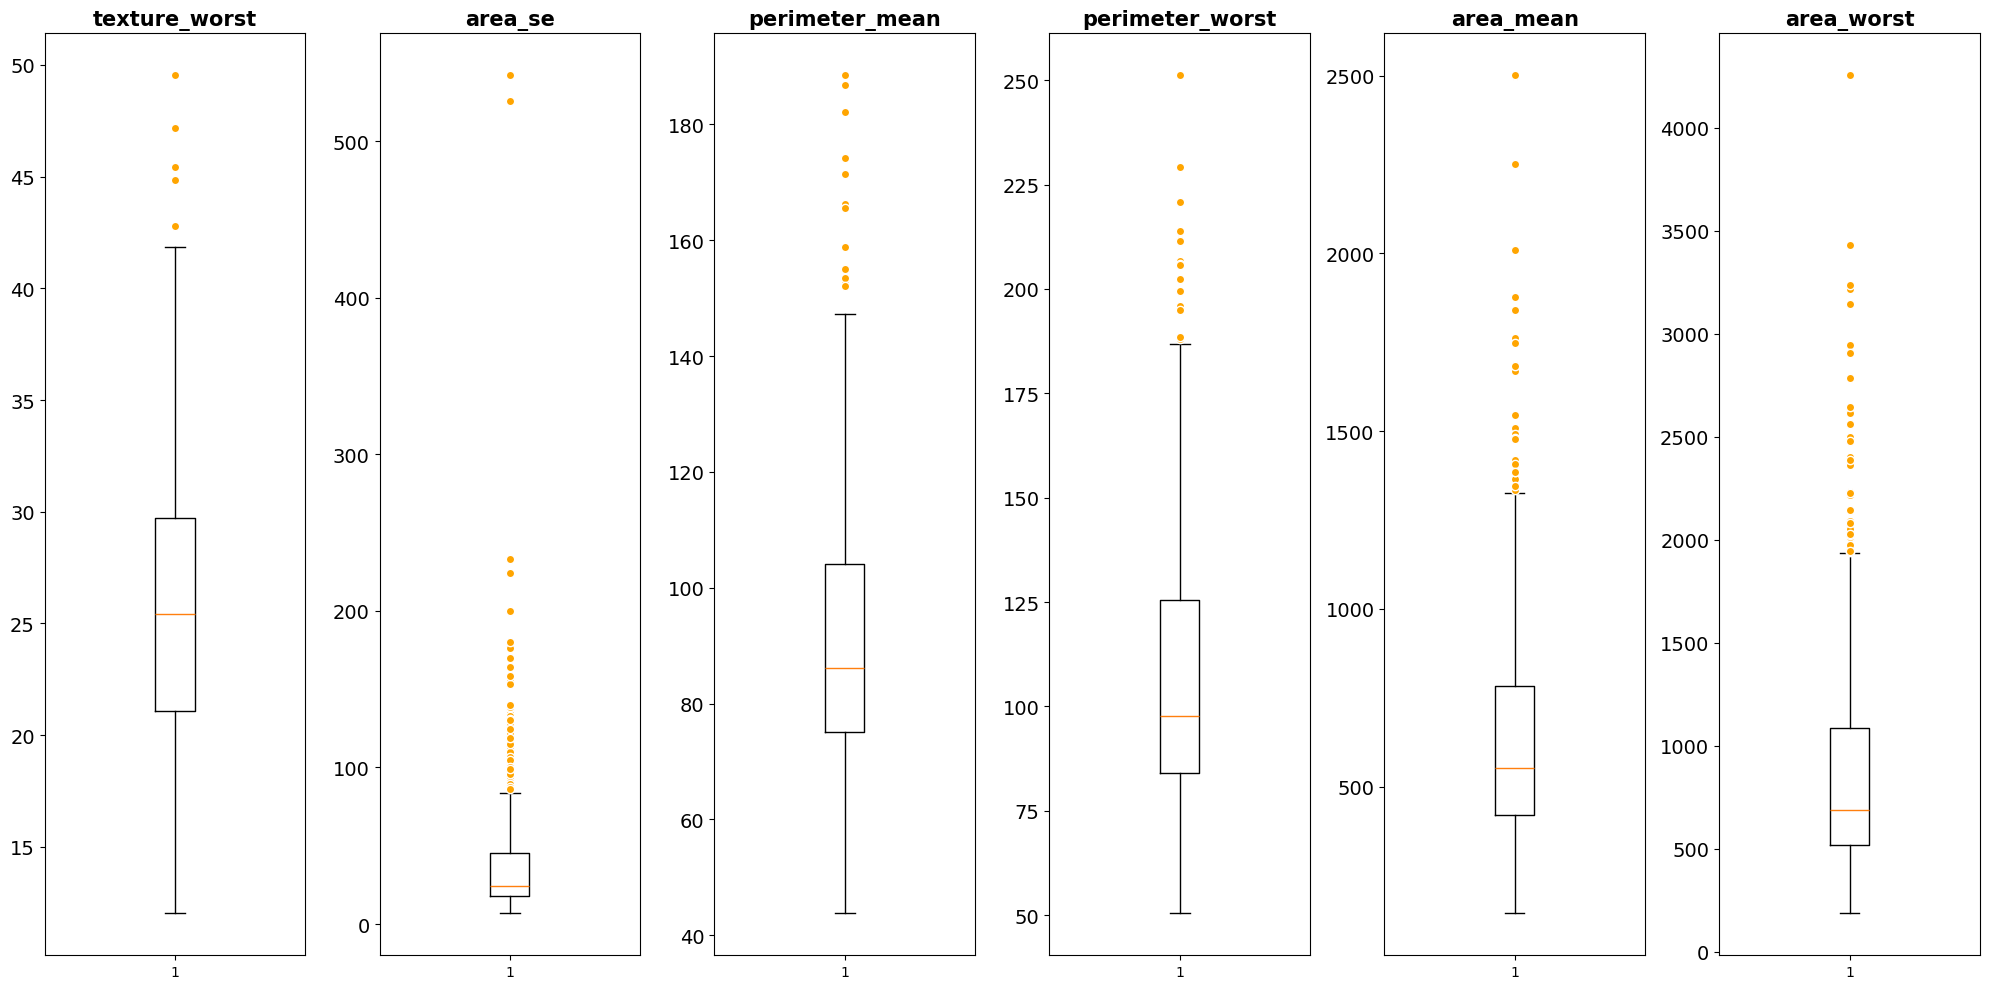

In [129]:
orange_circle = dict(markerfacecolor="orange", marker ="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(q.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(q.iloc[:,i], flierprops=orange_circle)
    ax.set_title(q.columns[i], fontsize=15, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
plt.tight_layout()

In [130]:
n

,concave points_mean,fractal_dimension_mean,fractal_dimension_worst,concavity_mean,smoothness_mean,compactness_mean
0,0.14710,0.07871,0.11890,0.30010,0.11840,0.27760
1,0.07017,0.05667,0.08902,0.08690,0.08474,0.07864
2,0.12790,0.05999,0.08758,0.19740,0.10960,0.15990
3,0.10520,0.09744,0.17300,0.24140,0.14250,0.28390
4,0.10430,0.05883,0.07678,0.19800,0.10030,0.13280
...,...,...,...,...,...,...
564,0.13890,0.05623,0.07115,0.24390,0.11100,0.11590
565,0.09791,0.05533,0.06637,0.14400,0.09780,0.10340
566,0.05302,0.05648,0.07820,0.09251,0.08455,0.10230
567,0.15200,0.07016,0.12400,0.35140,0.11780,0.27700


In [131]:
new_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [132]:
new_dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [134]:
print(new_dataset.dtypes)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [135]:
new_dataset['diagnosis'] = pd.to_numeric(new_dataset['diagnosis'], errors='coerce')


In [137]:
new_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,NaN,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,NaN,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,NaN,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,NaN,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,NaN,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,NaN,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,NaN,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,NaN,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [138]:
corr = new_dataset.corr()
corr


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,NaN,0.031211,0.080933,0.027584,0.037314,-0.024039,-0.024736,0.008195,0.006641,...,0.035611,0.053426,0.029903,0.040053,0.008935,-0.017916,-0.001850,0.007400,-0.041547,-0.025979
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,0.031211,NaN,1.000000,0.310966,0.997582,0.989735,0.160321,0.493018,0.655098,0.804474,...,0.968225,0.282320,0.961995,0.950814,0.109264,0.408997,0.517901,0.727019,0.174849,0.018039
texture_mean,0.080933,NaN,0.310966,1.000000,0.317562,0.310755,-0.027422,0.230712,0.293231,0.282526,...,0.339801,0.911643,0.346476,0.335497,0.072396,0.276257,0.293256,0.283481,0.108617,0.123326
perimeter_mean,0.027584,NaN,0.997582,0.317562,1.000000,0.988599,0.199508,0.547673,0.697962,0.836151,...,0.968972,0.289792,0.968796,0.952424,0.142791,0.454228,0.557633,0.756983,0.201624,0.065120
area_mean,0.037314,NaN,0.989735,0.310755,0.988599,1.000000,0.167930,0.490226,0.668371,0.809269,...,0.958990,0.274129,0.953458,0.958884,0.114281,0.390394,0.509172,0.709473,0.159287,0.017759
smoothness_mean,-0.024039,NaN,0.160321,-0.027422,0.199508,0.167930,1.000000,0.659026,0.521967,0.561593,...,0.211850,0.034257,0.239280,0.212400,0.806022,0.469259,0.430808,0.505562,0.394658,0.502209
compactness_mean,-0.024736,NaN,0.493018,0.230712,0.547673,0.490226,0.659026,1.000000,0.883460,0.834341,...,0.535918,0.246233,0.594923,0.526109,0.567895,0.864557,0.813285,0.814459,0.513591,0.698984
concavity_mean,0.008195,NaN,0.655098,0.293231,0.697962,0.668371,0.521967,0.883460,1.000000,0.918236,...,0.676954,0.295074,0.721571,0.679053,0.452294,0.757202,0.885550,0.856536,0.420552,0.537888
concave points_mean,0.006641,NaN,0.804474,0.282526,0.836151,0.809269,0.561593,0.834341,0.918236,1.000000,...,0.822261,0.283938,0.850156,0.817164,0.460241,0.671924,0.753074,0.907562,0.391681,0.394464


<Axes: >

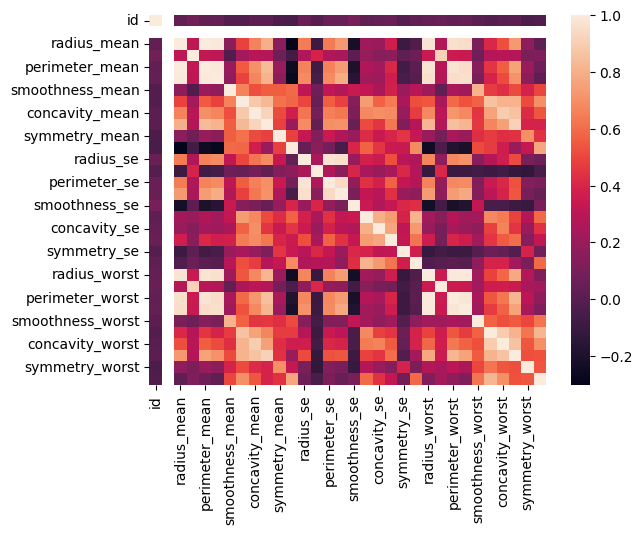

In [143]:
sns.heatmap(new_dataset.corr().round(2))